# Persistency of Drug Prediction

#By : **Sourour Cherif**
#Mail : Sourour.cherif@esprit.tn 
#**Data Science Engineering Student**
#**Esprit Tunisia**

**Problem Statement:**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

**ML Problem:**

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

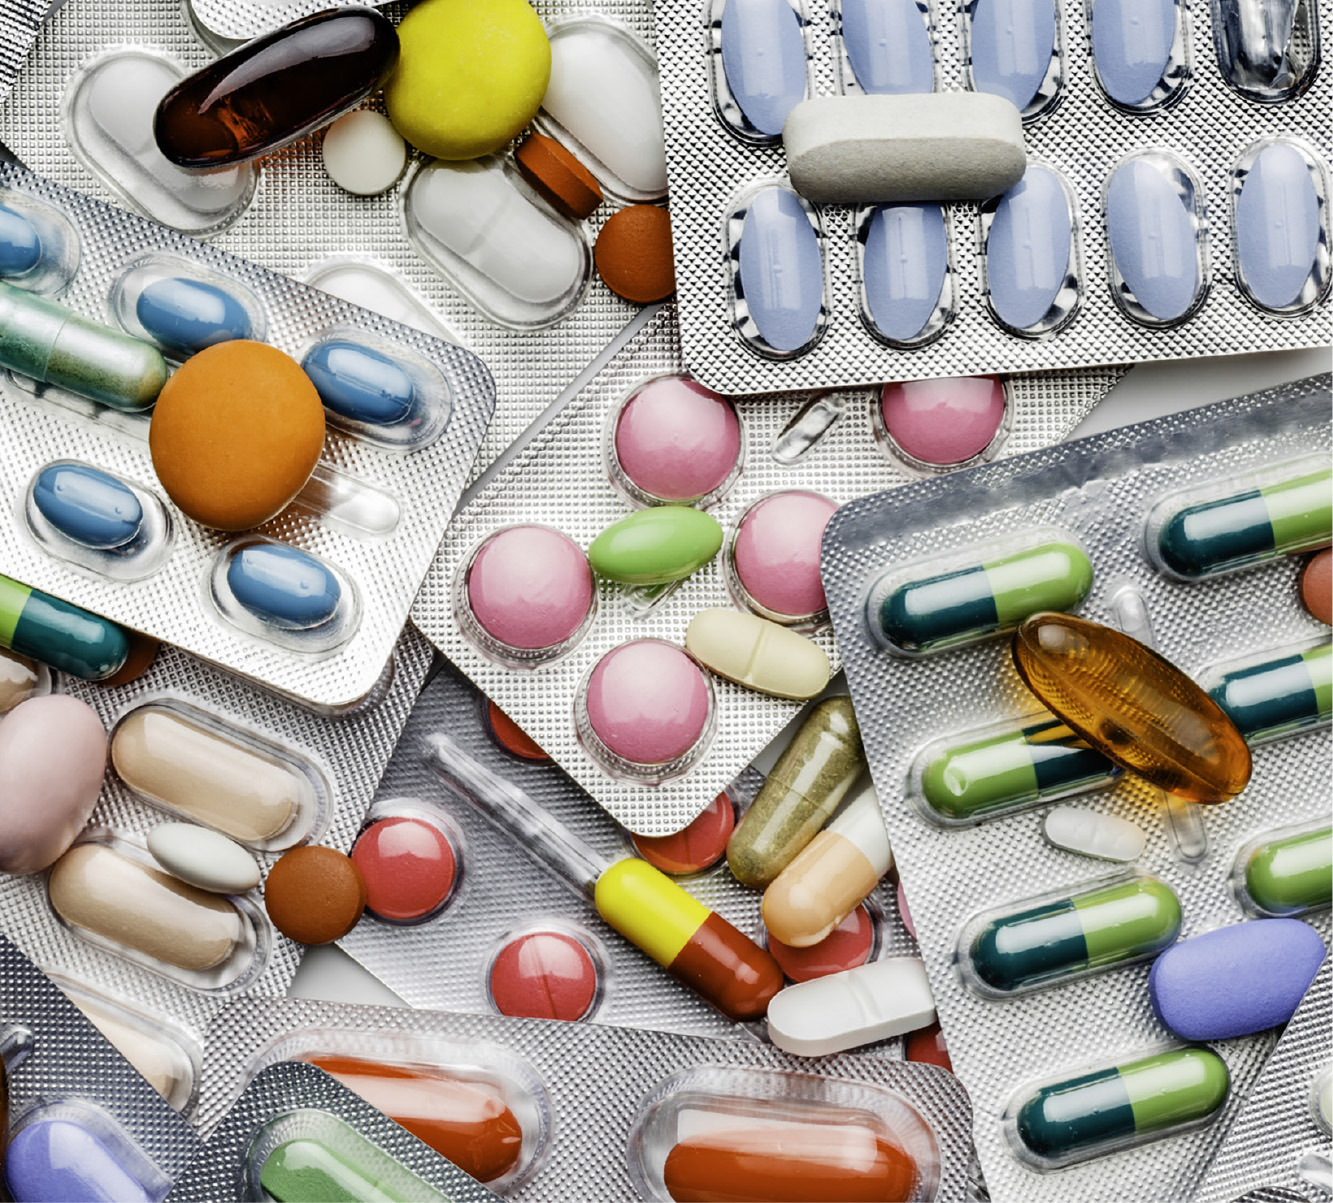

# **Libraries**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
# import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
# import statsmodels.api as sm
import seaborn as sns
sns.set()

# **Load the data**

In [ ]:
# Convert the xlsx file to csv

# Read and store content of the excel file 
read_file = pd.read_excel ("Healthcare_dataset.xlsx", 'Dataset')
  
# Write the dataframe object into csv file
read_file.to_csv ("Healthcare_dataset.csv", 
                  index = None,
                  header=True)

# **Data Understanding**

In [ ]:
# Read the csv dataset
data = pd.read_csv('Healthcare_dataset.csv')

# Drop the ID variable
data = data.drop(["Ptid"], axis=1)

data.head()

Persistency_Flag  Gender           Race     Ethnicity   Region Age_Bucket  \
0       Persistent    Male      Caucasian  Not Hispanic     West        >75   
1   Non-Persistent    Male          Asian  Not Hispanic     West      55-65   
2   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest      65-75   
3   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest        >75   
4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

  Gluco_Record_Prior_Ntm  ... Risk_Family_History_Of_Osteoporosis  \
0                      N  ...                                   N   
1                      N  ...                                   N   
2                      N  ...                                   N   
3                      N  ...                                   N   
4                      Y  ...                                   N   

   Risk_Low_Calcium_Intake Risk_Vitamin_D_Insufficiency  \
0                        N                            N   
1                        N                            N   
2                        Y                            N   
3                        N                            N   
4                        N                            N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 68 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [ ]:
data.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [ ]:
global_mean = data.Persistency_Flag.mean()
round(global_mean, 3)

In [ ]:
for col in cat_columns:
    df_group = data.groupby(by=col).Persistency_Flag.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

# Data Cleaning

In [ ]:
# Total number of missing values
data.isnull().sum().sum()

0

No Missing Values

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3276, dtype: bool

In [ ]:
# Dimension of the dataset
data.shape

(3424, 68)

In [ ]:
# Standardize column names

columns = list(data.columns)

for item in columns:
    special_characters = "!@#$%^&*()-+?=,<>/"
    
    for character in special_characters:
        if character in item:
            print(f"Feature: {item}, is not well formatted")

Feature: Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, is not well formatted


In [ ]:
# Remove the "," from this feature name

data["Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx"] = data["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"]
data = data.drop(["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"], axis=1)
data.shape

(3424, 68)

In [ ]:
# Numeric Columns
numeric_col = list(data._get_numeric_data().columns)
numeric_col

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

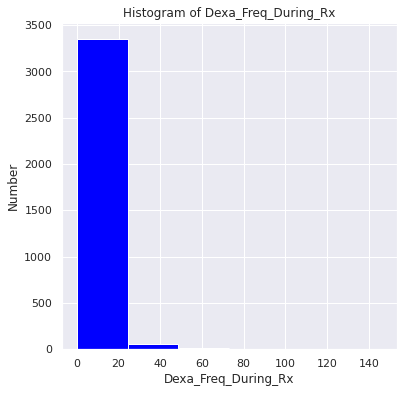

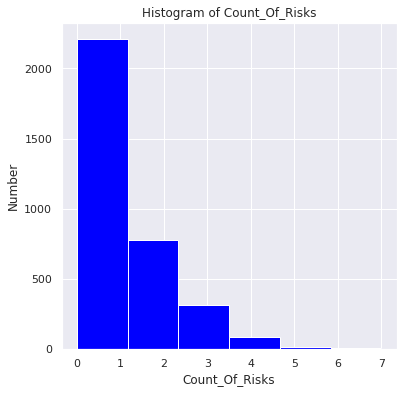

In [ ]:
# ploting histogram for numerical columns
def plot_histogram(data, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax= fig.gca()
        data[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(data, numeric_col)

# **Measuring skewness and kurtosis of numerical columns**

In [ ]:
# PERFPROMING THE CORRELATION BEFORE OUTLIERS AND SKEW DATA
#correlation using numpy
np.corrcoef(data['Dexa_Freq_During_Rx'],data['Count_Of_Risks'])

array([[1.        , 0.01396392],
       [0.01396392, 1.        ]])

In [ ]:
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = data[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(numeric_col)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


In [ ]:
#skew and kurtosis values
data.agg(['skew', 'kurtosis']).transpose()

skew   kurtosis
Dexa_Freq_During_Rx  6.808730  74.758378
Count_Of_Risks       0.879791   0.900486

In [ ]:
data[['log_Dexa','log_Count_Risks']] = np.log1p(data[['Dexa_Freq_During_Rx','Count_Of_Risks']])

In [ ]:
data[['log_Dexa','log_Count_Risks']]

log_Dexa  log_Count_Risks
0     0.000000         0.000000
1     0.000000         0.000000
2     0.000000         1.098612
3     0.000000         0.693147
4     0.000000         0.693147
...        ...              ...
3419  0.000000         0.693147
3420  0.000000         0.000000
3421  2.079442         0.693147
3422  0.000000         0.000000
3423  0.000000         0.693147

[3424 rows x 2 columns]

In [ ]:
#Checking skew after transformation
data.agg(['skew', 'kurtosis']).transpose()

skew   kurtosis
Dexa_Freq_During_Rx  6.808730  74.758378
Count_Of_Risks       0.879791   0.900486
log_Dexa             1.405860   0.624570
log_Count_Risks     -0.091583  -1.006414

### Detect and Remove Outliers

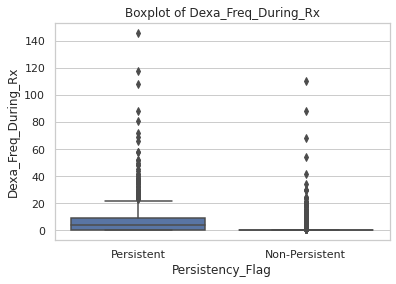

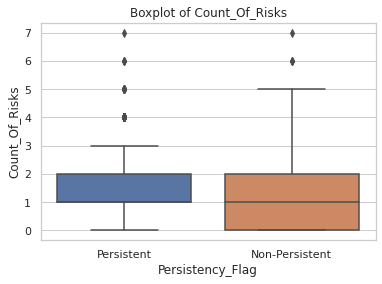

In [ ]:
# creating a box plot of numerical columns against persitency flag to identify outliers
def boxplot(data, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=data)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(data, numeric_col)

In [ ]:
data['Dexa_Freq_During_Rx'].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

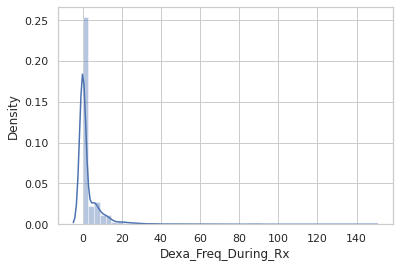

In [ ]:
# Spot Outliers for Dexa_Freq_During_Rx
sns.distplot(data['Dexa_Freq_During_Rx'])

In [ ]:
# To remove the 99th percentile
q = data['Dexa_Freq_During_Rx'].quantile(0.99)
data_1 = data[data['Dexa_Freq_During_Rx']<q]
data_1.describe()

Dexa_Freq_During_Rx  Count_Of_Risks     log_Dexa  log_Count_Risks
count          3389.000000     3389.000000  3389.000000      3389.000000
mean              2.440248        1.240484     0.572915         0.685941
std               5.183446        1.095904     0.997375         0.499826
min               0.000000        0.000000     0.000000         0.000000
25%               0.000000        0.000000     0.000000         0.000000
50%               0.000000        1.000000     0.000000         0.693147
75%               3.000000        2.000000     1.386294         1.098612
max              34.000000        7.000000     3.555348         2.079442

In [ ]:
data_1['Dexa_Freq_During_Rx'].value_counts()

0     2488
5      114
6      107
7       93
8       71
4       68
10      55
12      52
3       46
14      38
9       32
11      30
1       24
2       24
13      19
20      15
16      14
18      14
22      13
26      10
24      10
15       9
30       7
28       7
17       7
21       7
19       3
34       3
32       3
25       2
27       1
23       1
33       1
29       1
Name: Dexa_Freq_During_Rx, dtype: int64

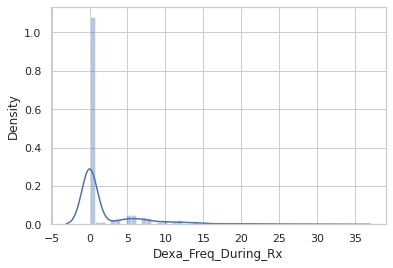

In [ ]:
sns.distplot(data_1['Dexa_Freq_During_Rx'])

In [ ]:
data_1['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
4      90
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

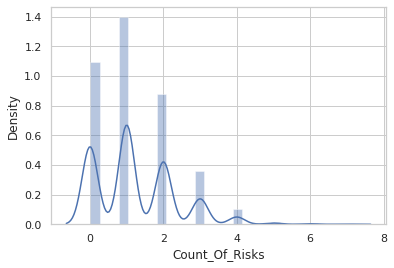

In [ ]:
# Spot Outliers for Count_Of_Risks
sns.distplot(data_1['Count_Of_Risks'])

In [ ]:
# To remove the 99th percentile
q = data_1['Count_Of_Risks'].quantile(0.99)
data_2 = data_1[data_1['Count_Of_Risks']<q]
data_2.describe()

Dexa_Freq_During_Rx  Count_Of_Risks     log_Dexa  log_Count_Risks
count          3276.000000     3276.000000  3276.000000      3276.000000
mean              2.434066        1.135226     0.567537         0.652349
std               5.215384        0.946362     0.996754         0.473482
min               0.000000        0.000000     0.000000         0.000000
25%               0.000000        0.000000     0.000000         0.000000
50%               0.000000        1.000000     0.000000         0.693147
75%               2.000000        2.000000     1.098612         1.098612
max              34.000000        3.000000     3.555348         1.386294

In [ ]:
data_2['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
Name: Count_Of_Risks, dtype: int64

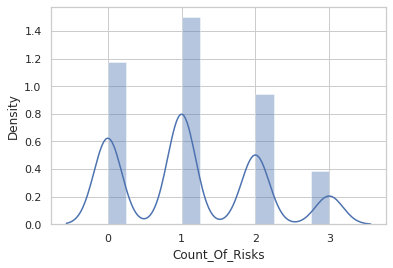

In [ ]:
sns.distplot(data_2['Count_Of_Risks'])

In [ ]:
# Data without outliers
data = data_2

In [ ]:
# Data containing only categorical variables
categoric_data = data.drop(numeric_col, axis=1)

In [ ]:
# Categorical Columns
cat_columns = list(categoric_data.columns)

In [ ]:
# Inspect the unique values of the categorical variables

for item in cat_columns:
    print(f"{item}: {categoric_data[item].unique()}")
    print("")

Persistency_Flag: ['Persistent' 'Non-Persistent']

Gender: ['Male' 'Female']

Race: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']

Ethnicity: ['Not Hispanic' 'Hispanic' 'Unknown']

Region: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']

Age_Bucket: ['>75' '55-65' '65-75' '<55']

Ntm_Speciality: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'PEDIATRICS' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS &

In [ ]:
# PERFPROMING THE CORRELATION BEFORE OUTLIERS AND SKEW DATA
#correlation using numpy
np.corrcoef(data['Dexa_Freq_During_Rx'],data['Count_Of_Risks'])

array([[1.        , 0.04935025],
       [0.04935025, 1.        ]])

In [ ]:
# The target variable
data["Persistency_Flag"].unique()

array(['Persistent', 'Non-Persistent'], dtype=object)

In [ ]:
# Encode the Target variable
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["Persistency_Flag"] = lb_make.fit_transform(data["Persistency_Flag"])

array([1, 0])

Note: 1 = Persistent, 0 = Non-Persistent 

In [ ]:
data["Persistency_Flag"].unique()

array([1, 0])

# **EDA**

## **Questions :**
What are the most common risk factors?

What’s the proportion of patients holding risk (and similar) factors that may affect treatment and diseases?

How do risk factors relate to demographics?

What is the proportion of patients who were affected by the treatment and had a fracture?

What is the proportion of patients who were affected by the treatment, decreasing their t-score?

**Correlation**

In [ ]:
corr = data.corr()

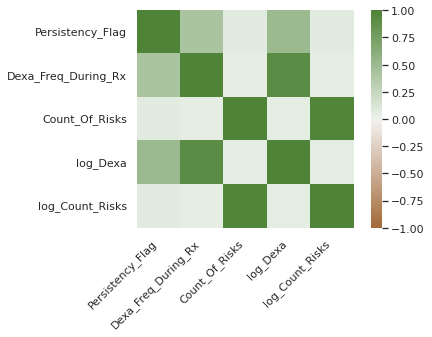

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(400, 3000, n=400),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Count plots of categorical columns**

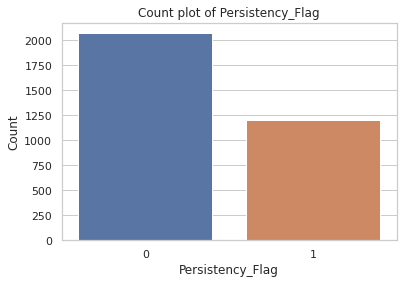

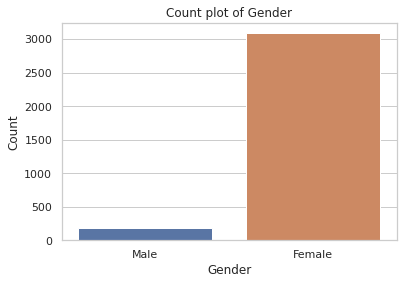

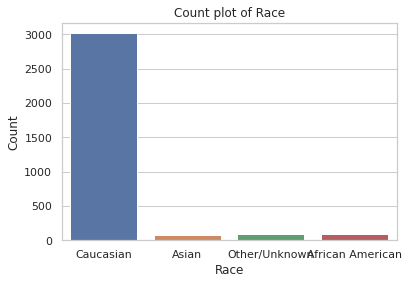

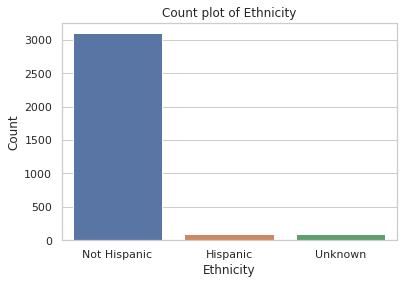

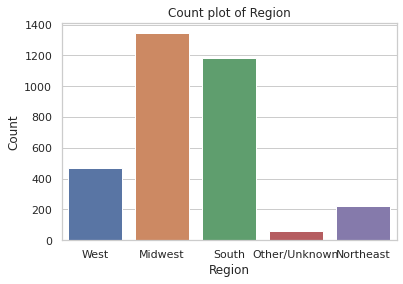

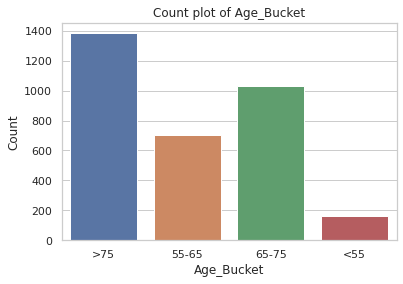

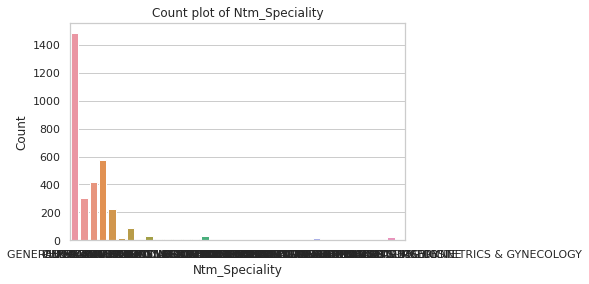

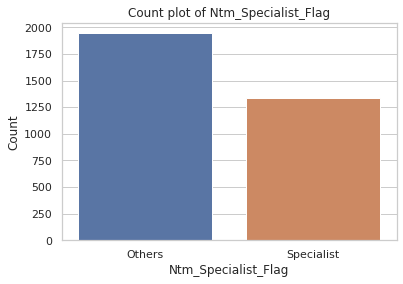

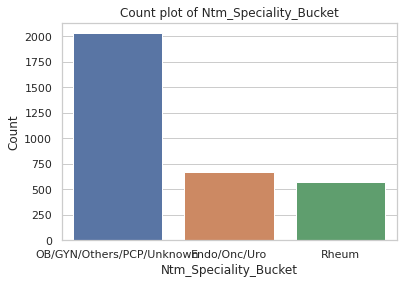

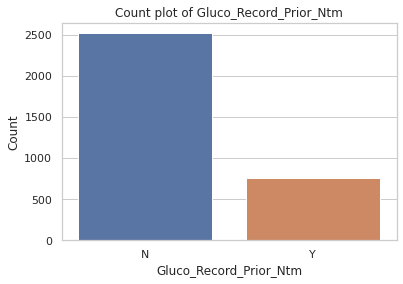

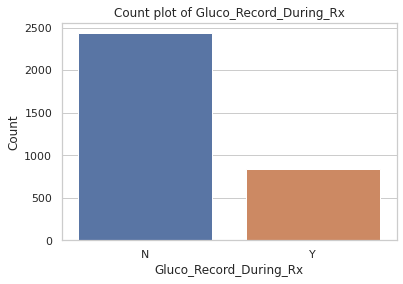

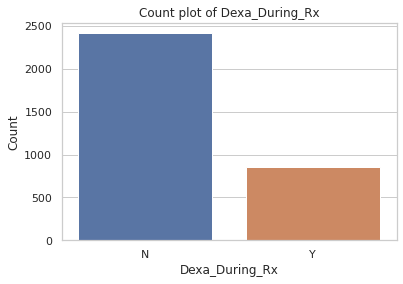

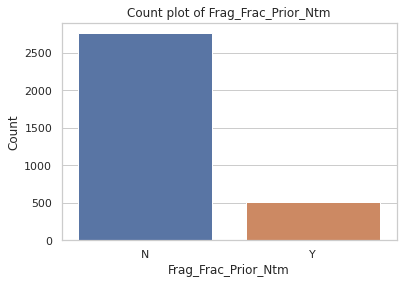

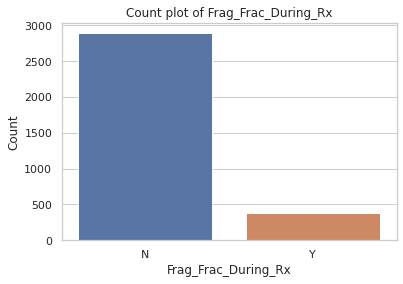

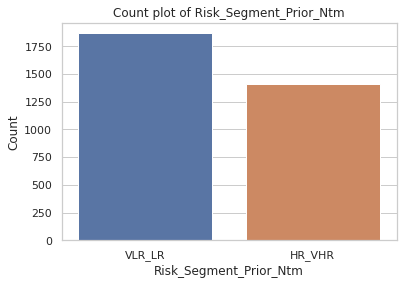

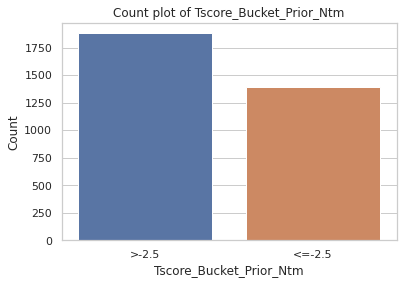

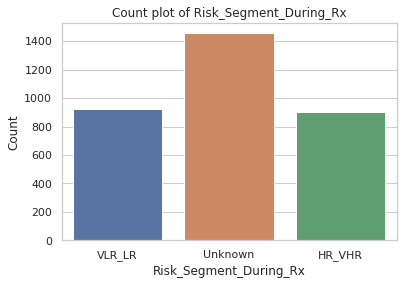

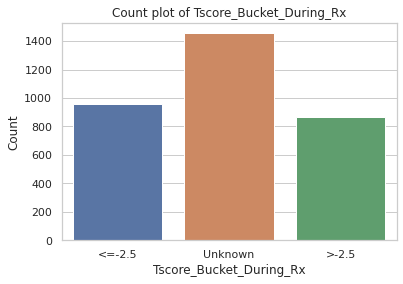

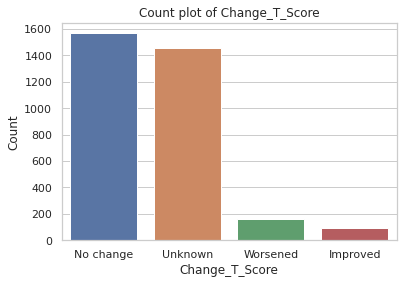

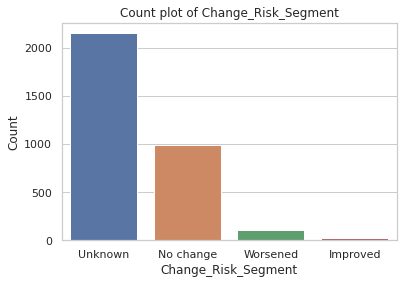

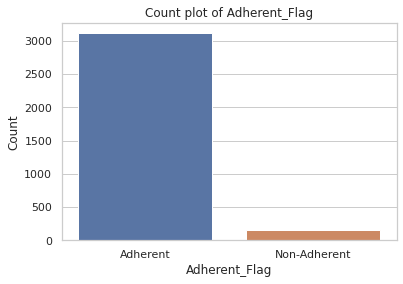

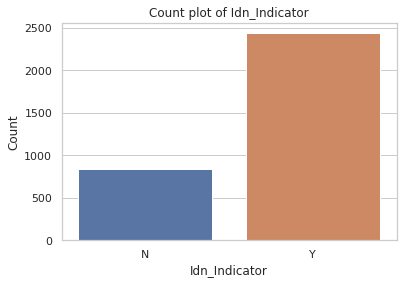

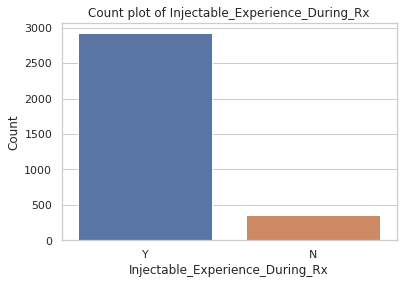

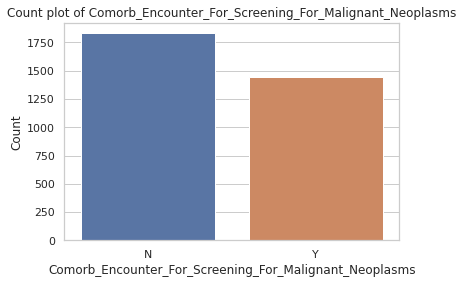

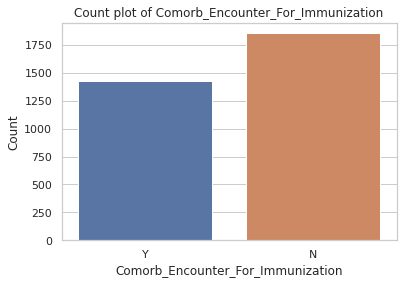

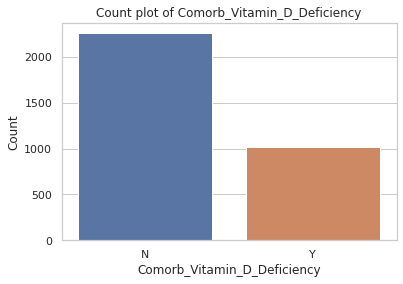

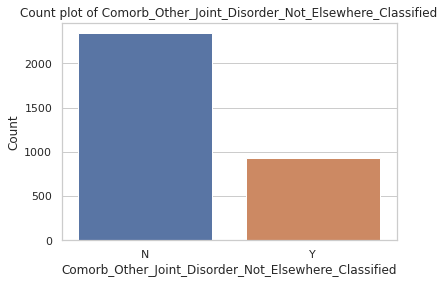

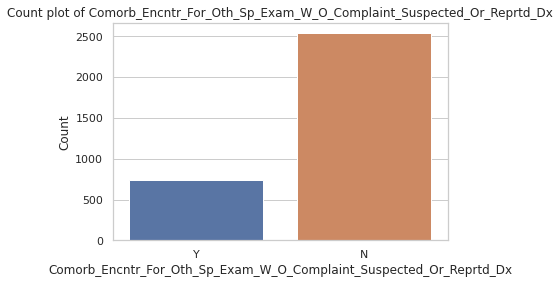

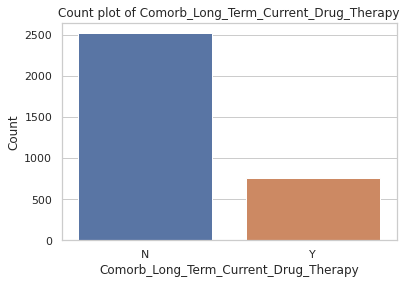

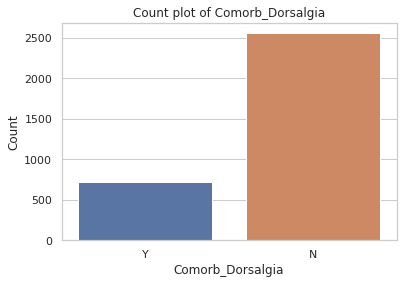

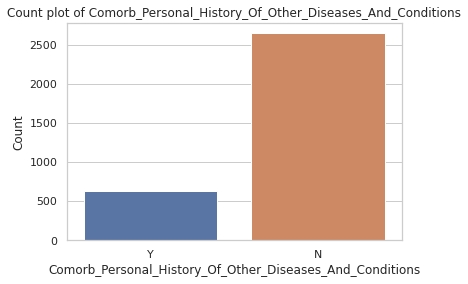

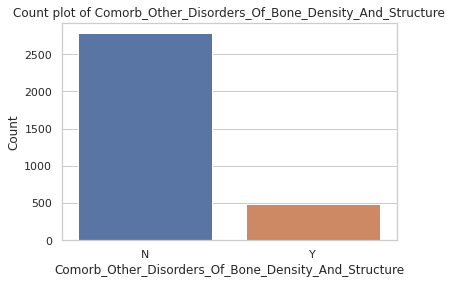

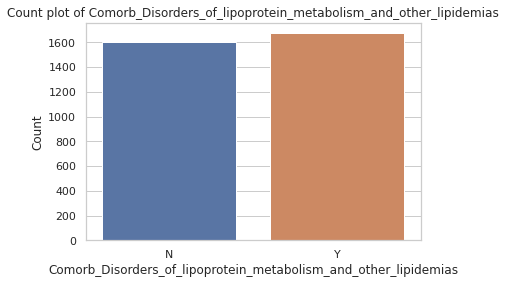

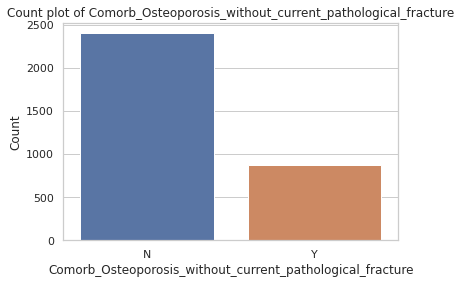

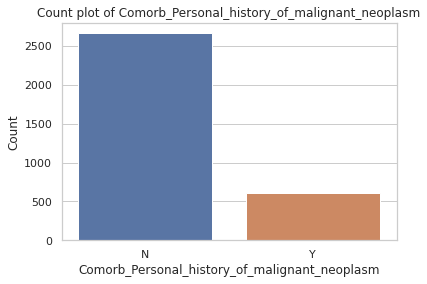

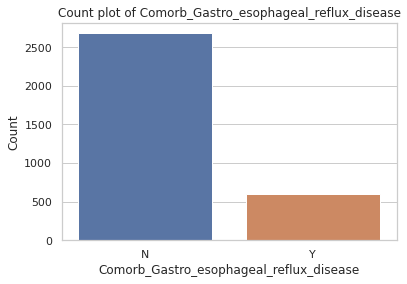

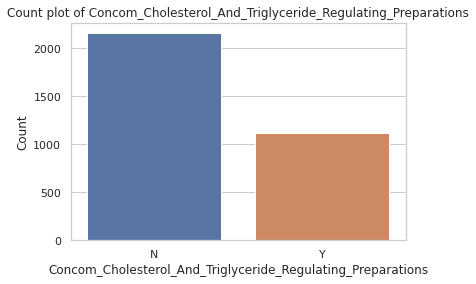

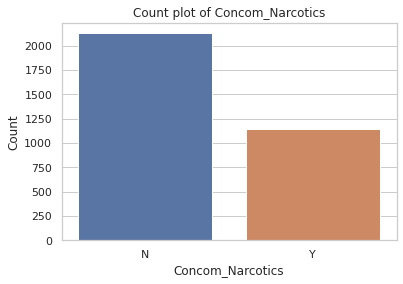

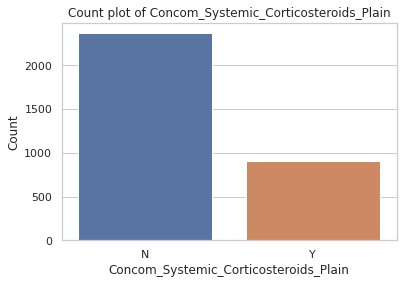

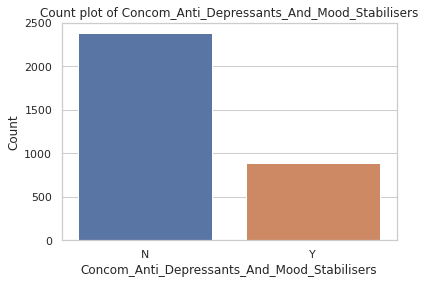

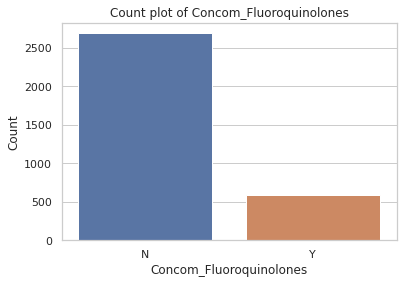

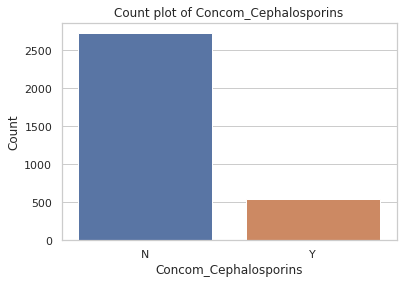

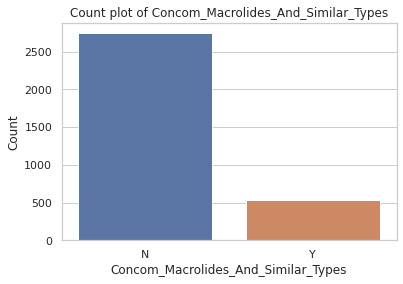

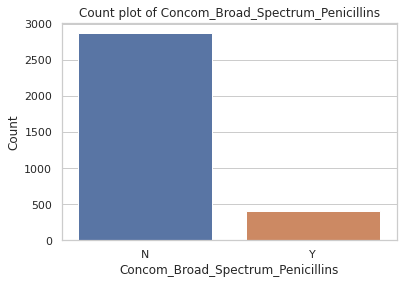

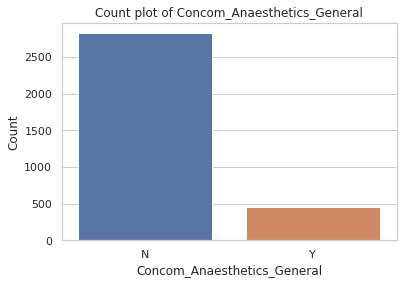

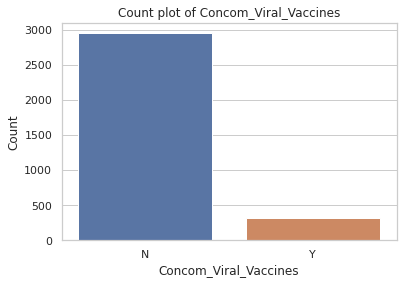

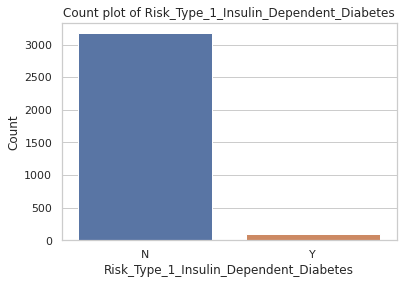

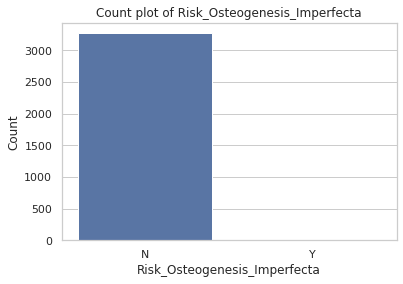

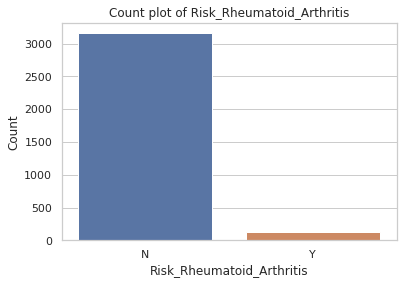

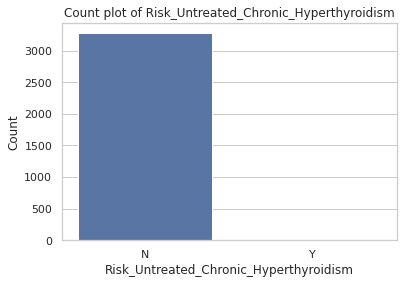

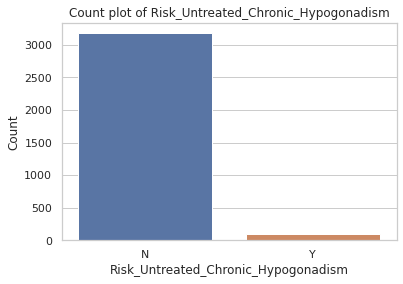

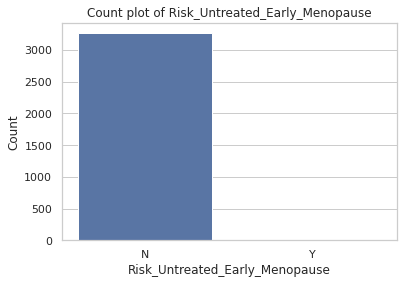

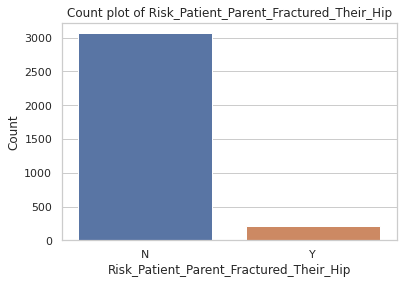

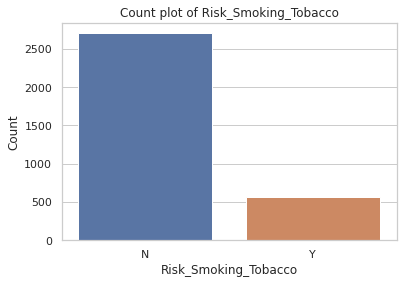

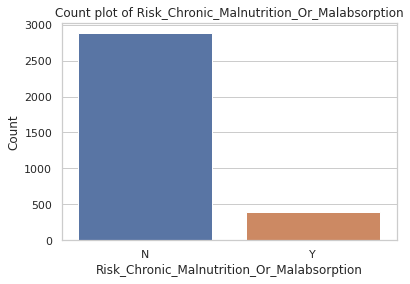

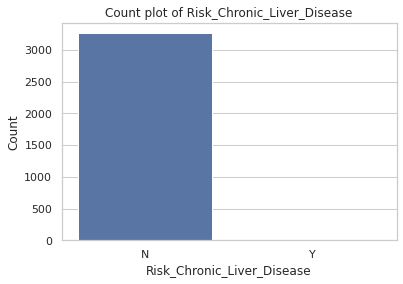

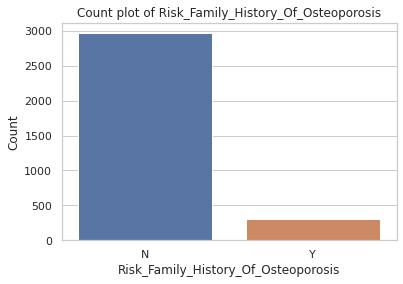

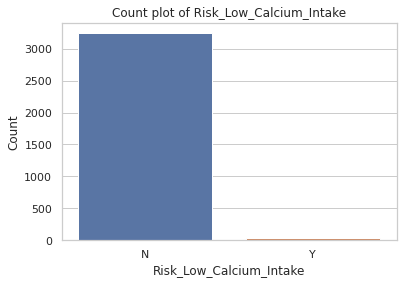

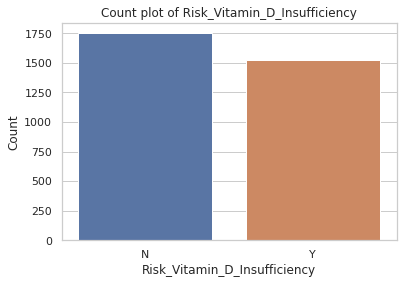

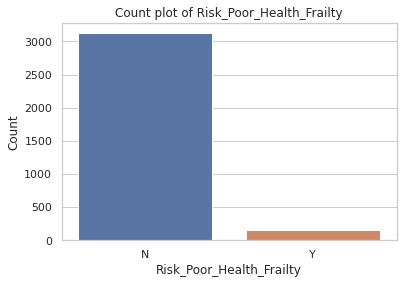

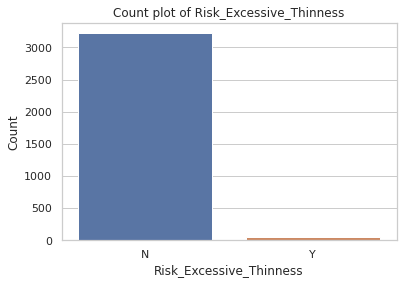

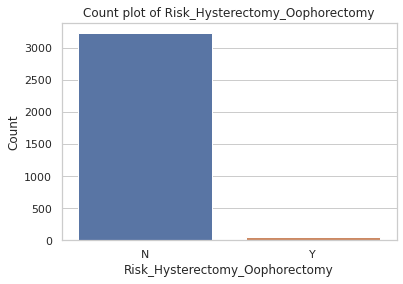

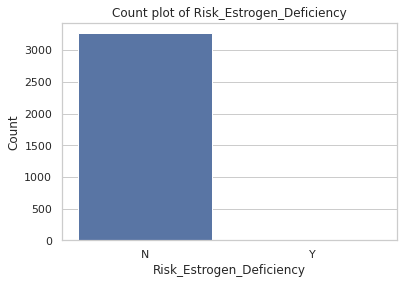

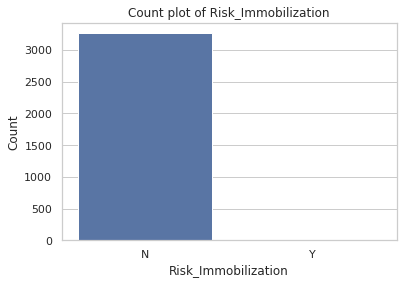

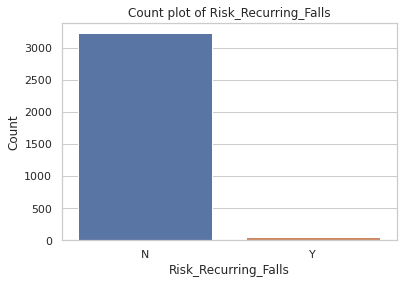

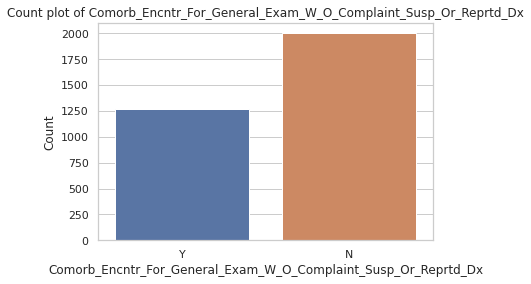

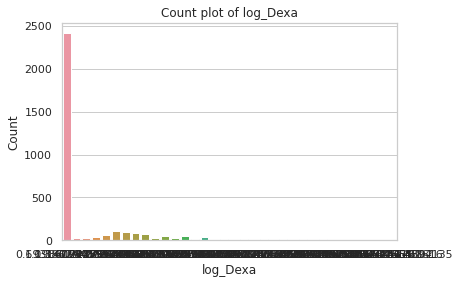

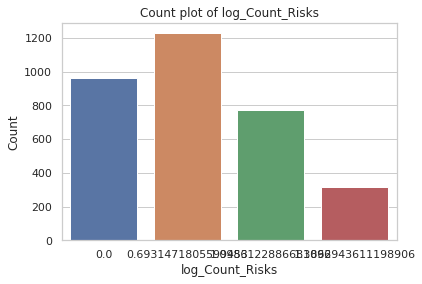

In [ ]:
for col in categoric_data:
        sns.set_style('whitegrid')
        sns.countplot(x=col, data=data)
        plt.title('Count plot of ' + col)
        plt.ylabel('Count') 
        plt.show()


**Persistency_Flag**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

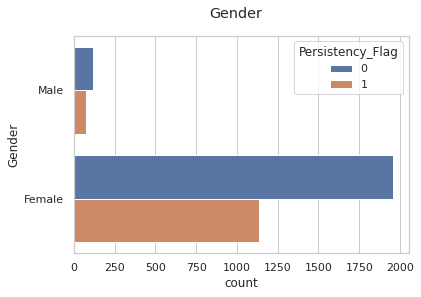

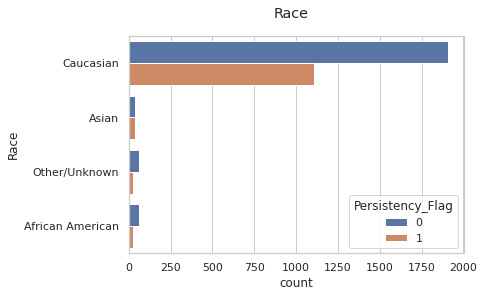

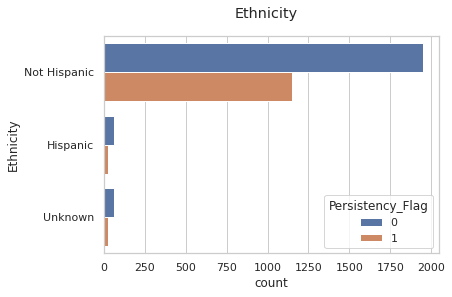

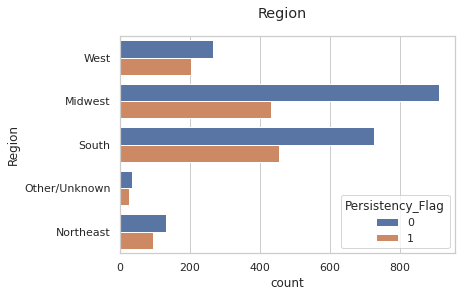

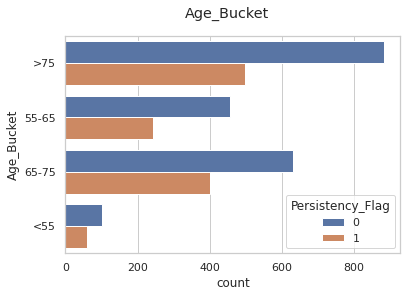

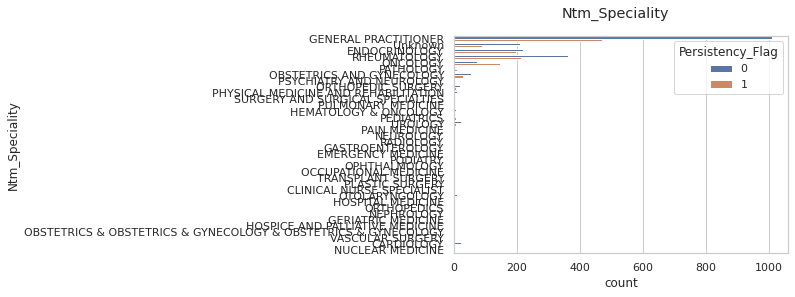

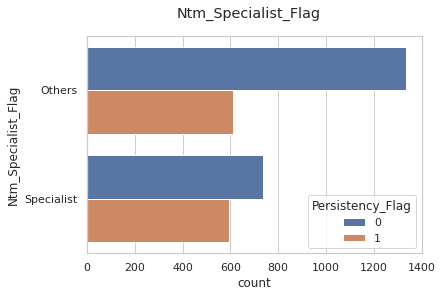

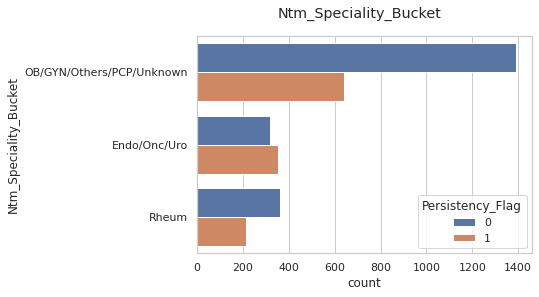

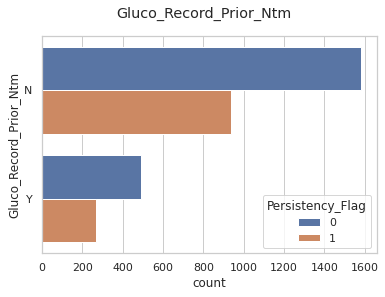

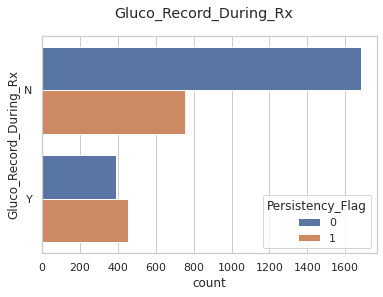

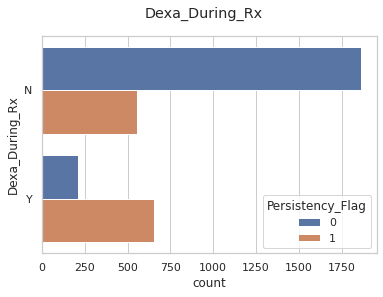

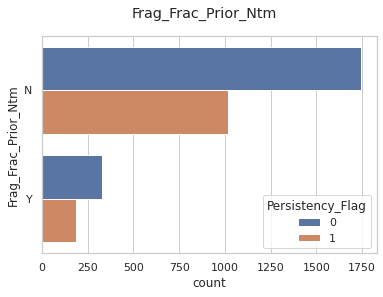

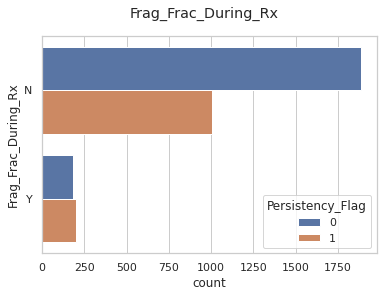

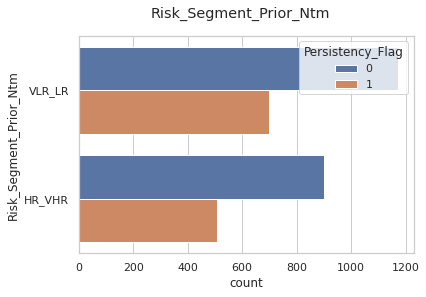

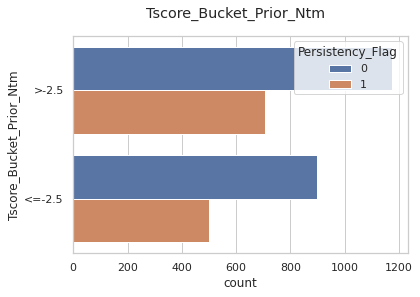

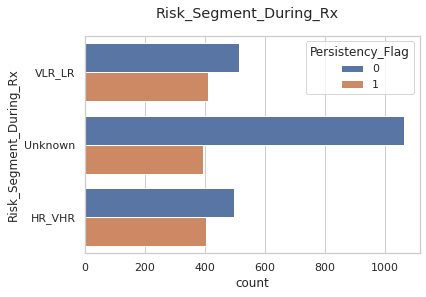

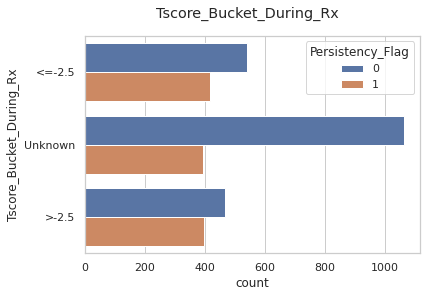

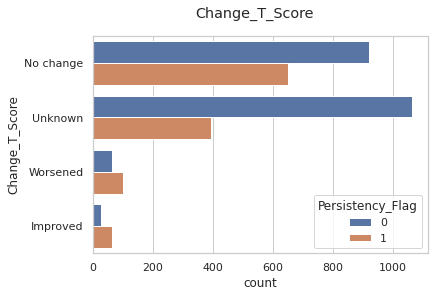

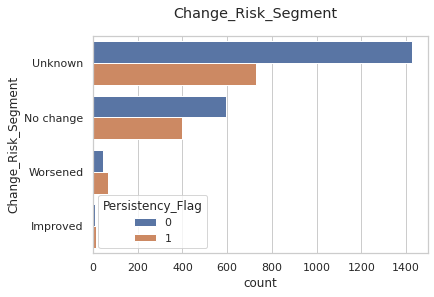

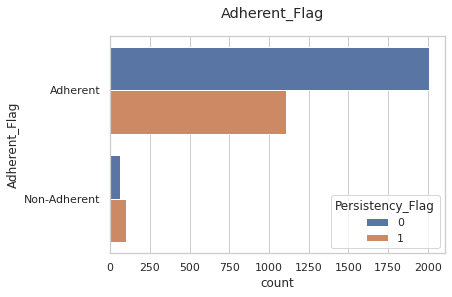

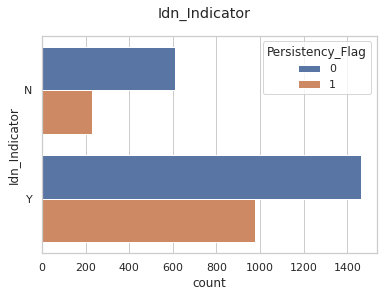

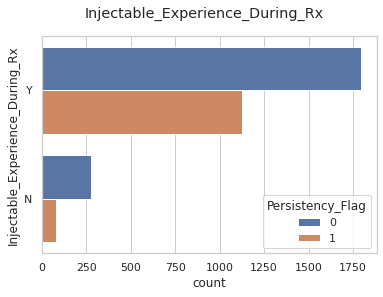

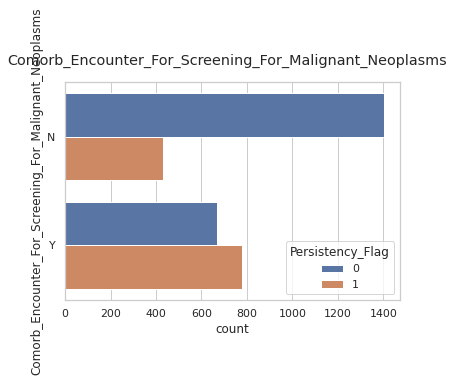

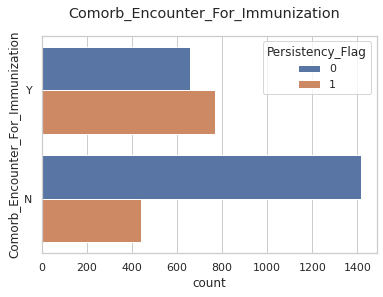

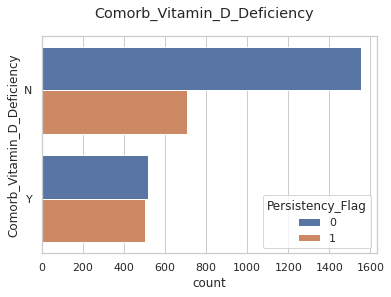

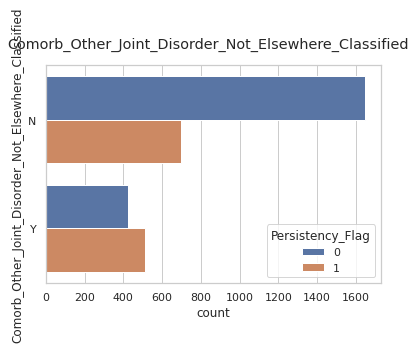

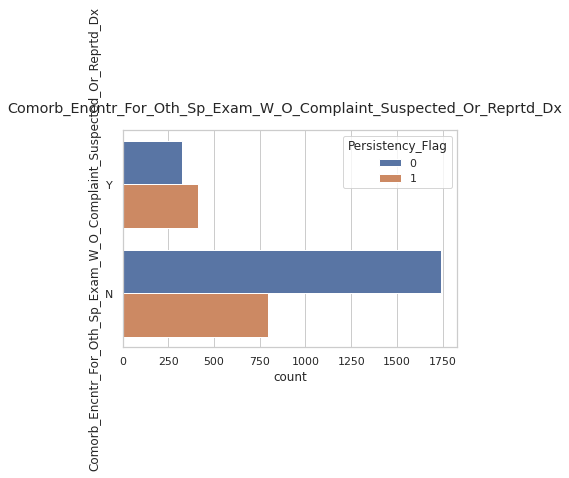

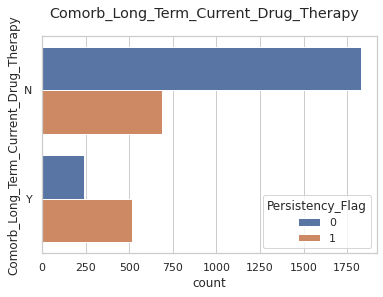

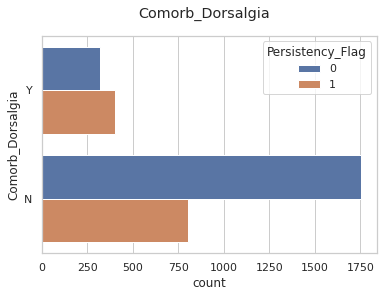

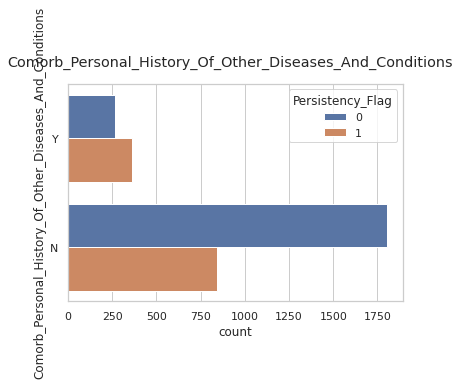

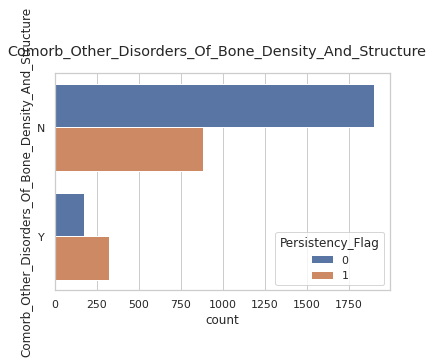

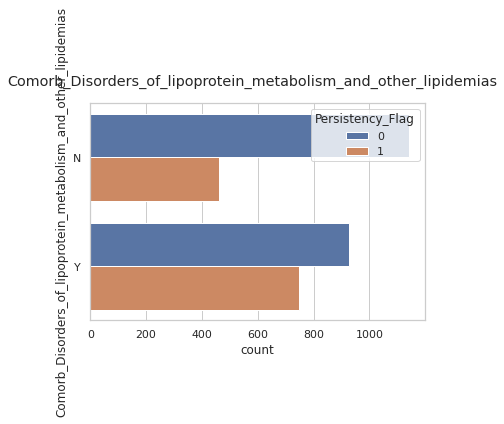

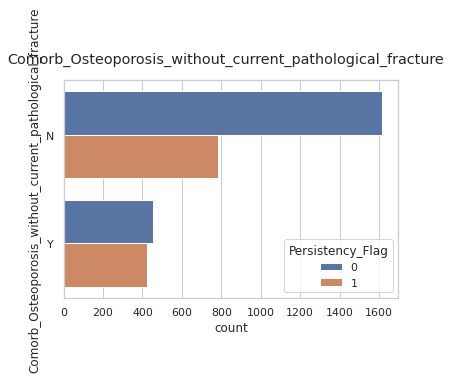

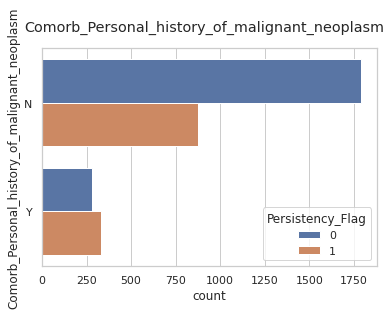

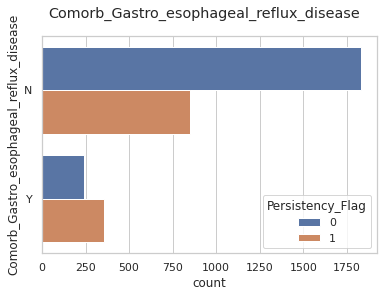

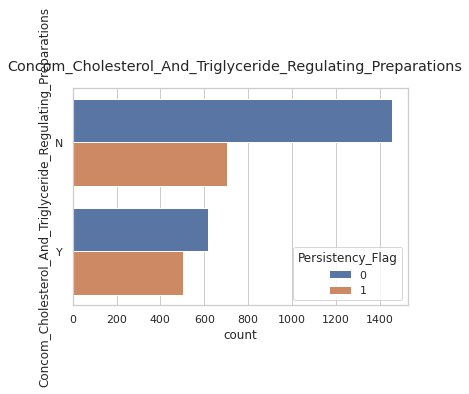

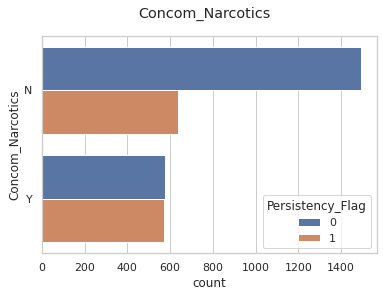

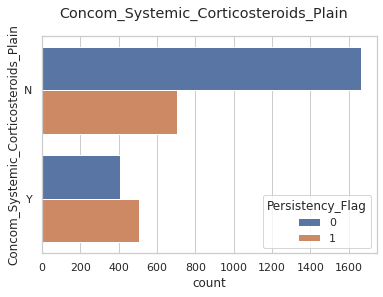

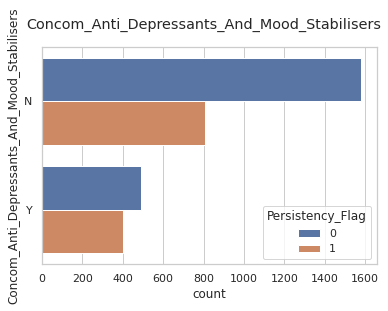

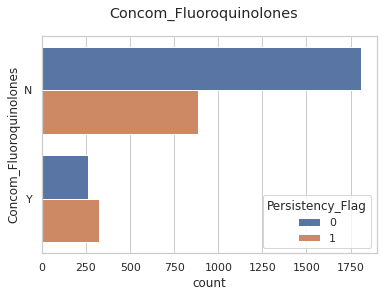

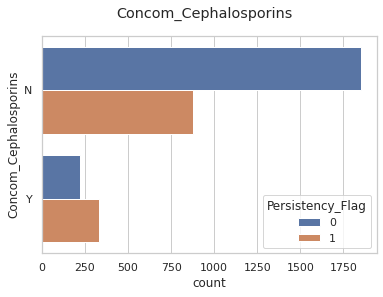

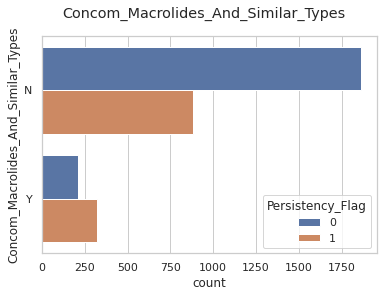

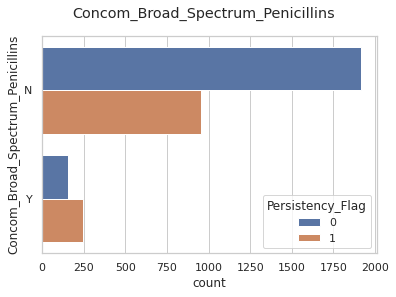

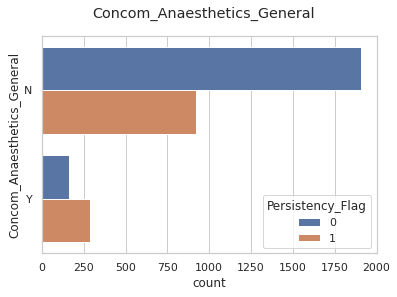

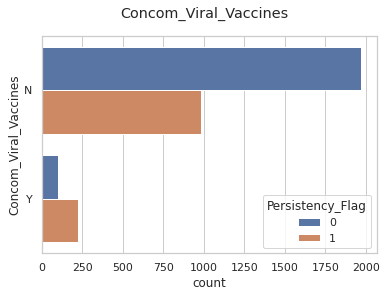

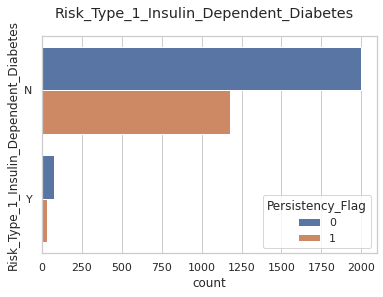

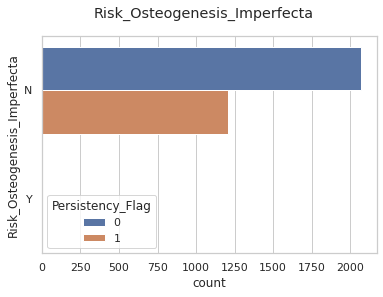

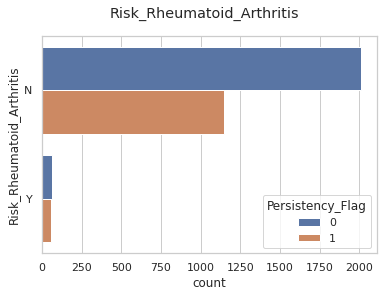

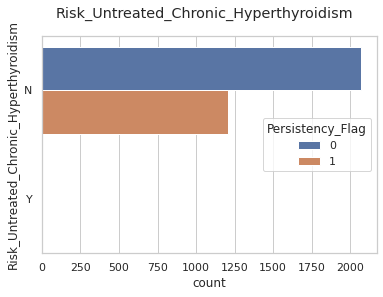

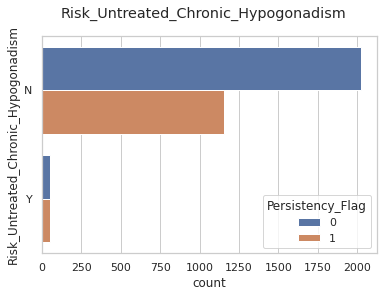

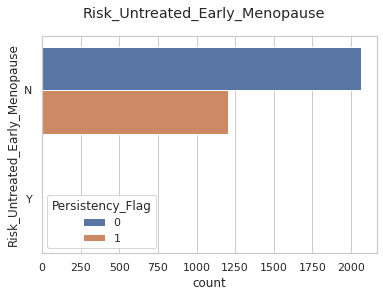

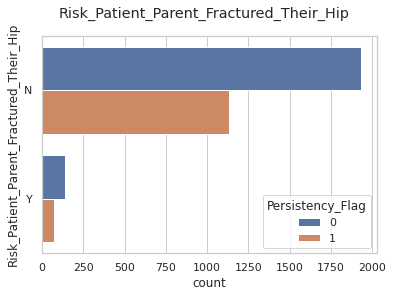

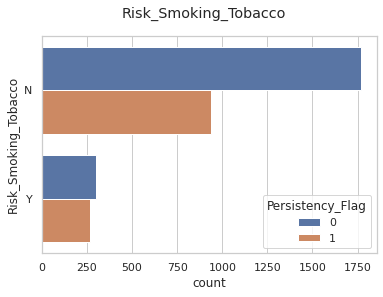

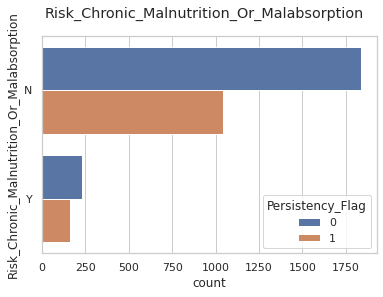

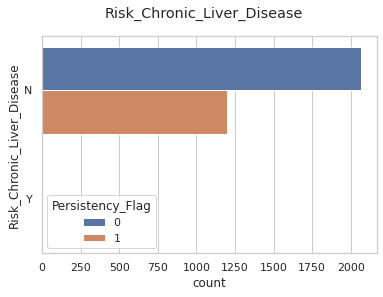

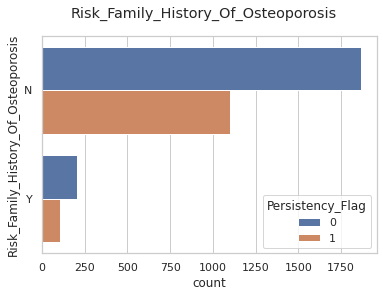

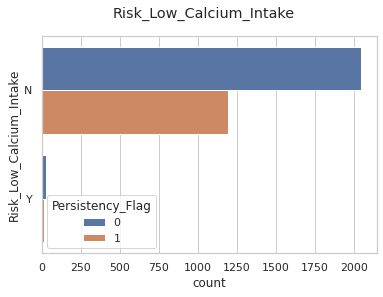

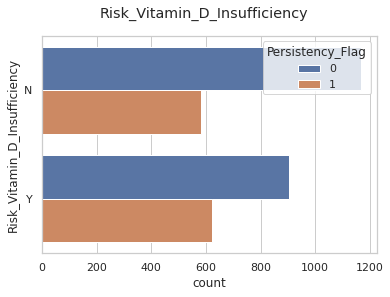

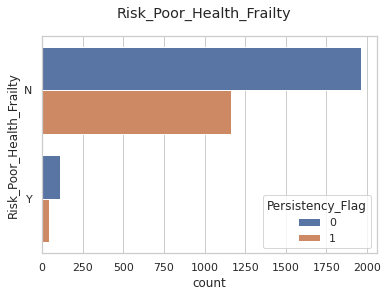

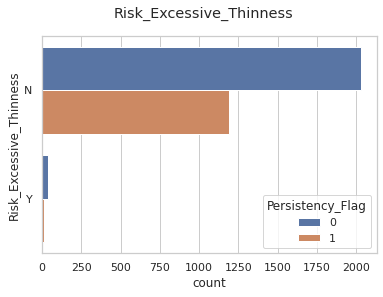

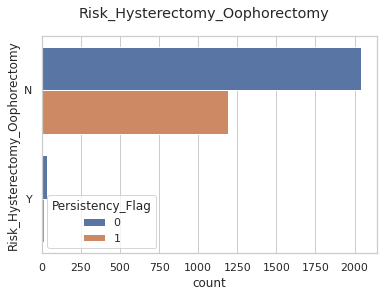

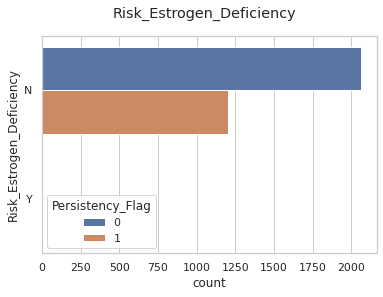

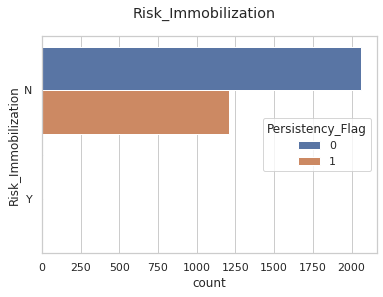

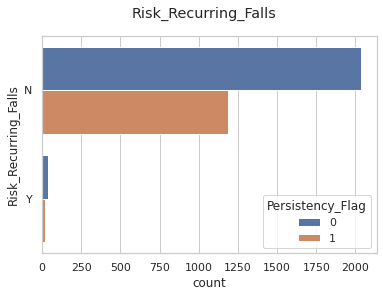

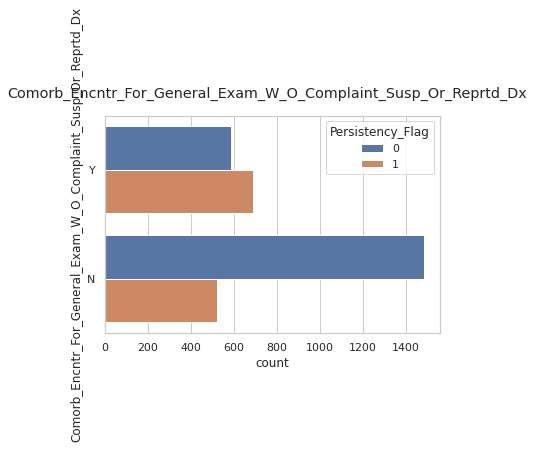

In [ ]:

for x in data.columns[data.dtypes==object]:
    fig=plt.figure()
    sns.countplot(y=data[x],hue=data['Persistency_Flag'],data=data)
    fig.suptitle(x)

**Gender grouped by Persistency_Flag**

In [ ]:
dataa=data.groupby('Persistency_Flag')['Gender'].value_counts(normalize=True)

([<matplotlib.patches.Wedge at 0x7f233c941250>,
 [Text(0.10022915183138507, 1.1456238986347838, "(0, 'Female')"),
  Text(-1.1456238945292259, 0.10022919875809441, "(0, 'Male')"),
  Text(-0.10917895928307432, -1.1448056406438016, "(1, 'Female')"),
  Text(1.1448056438381986, -0.10917892578793655, "(1, 'Male')")],
 [Text(0.04793568131066242, 0.5479070819557661, '47.2%'),
  Text(-0.5479070799922383, 0.04793570375387124, '2.8%'),
  Text(-0.05221602400494859, -0.5475157411774703, '47.0%'),
  Text(0.5475157427052254, -0.052216007985534864, '3.0%')])

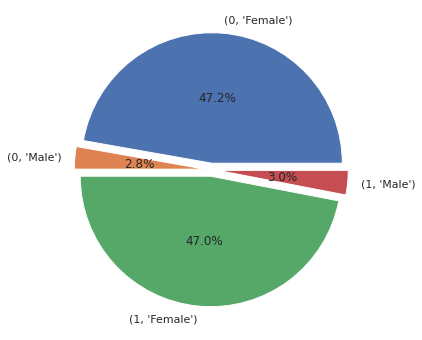

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dataa.keys()
plt.pie(x=dataa, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

**Ethnicity grouped by Persistency_Flag**

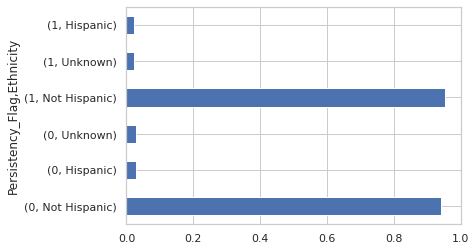

In [ ]:
data.groupby('Persistency_Flag')['Ethnicity'].value_counts(normalize=True).plot.barh()

**Region grouped by Persistency_Flag**

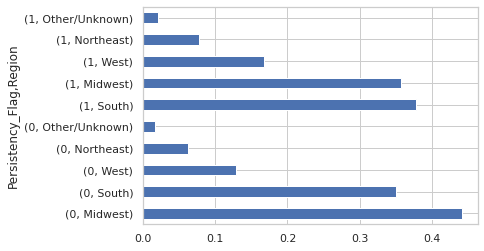

In [ ]:
data.groupby('Persistency_Flag')['Region'].value_counts(normalize=True).plot.barh()

**Age_Bucket grouped by Persistency_Flag**

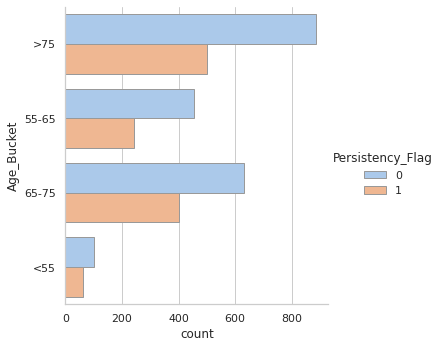

In [ ]:
sns.catplot(y="Age_Bucket",hue="Persistency_Flag", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

**Age_Bucket / Count_of_Risks**

**Age_Bucket / Dexa_Freq_During_Rx**

# **Risks**

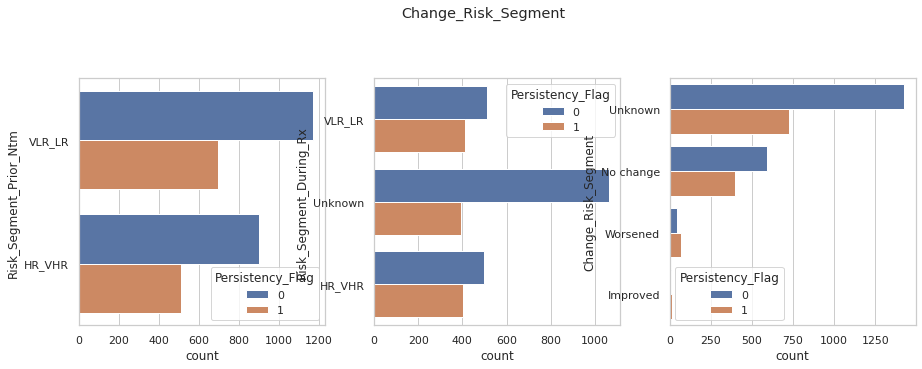

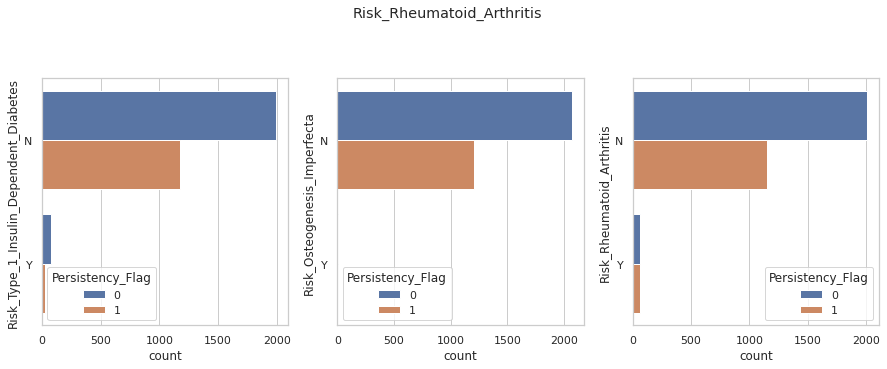

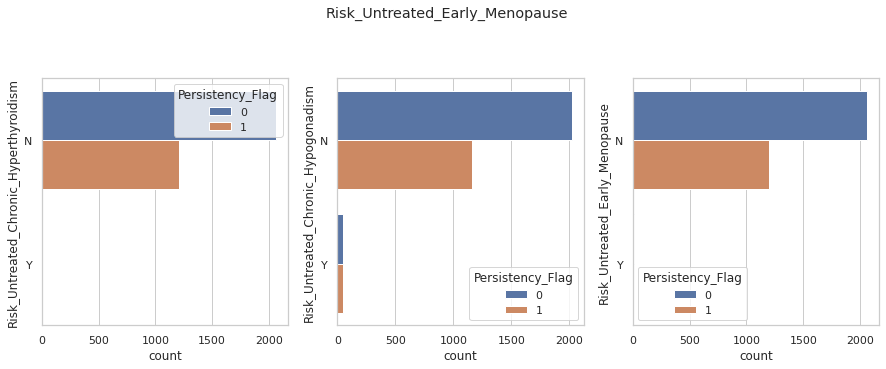

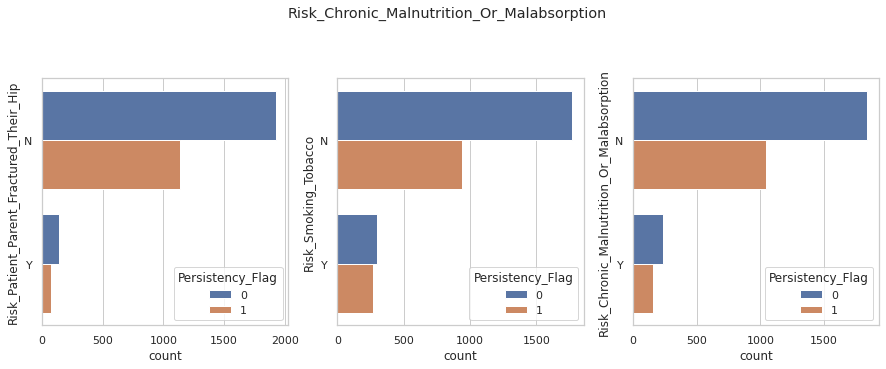

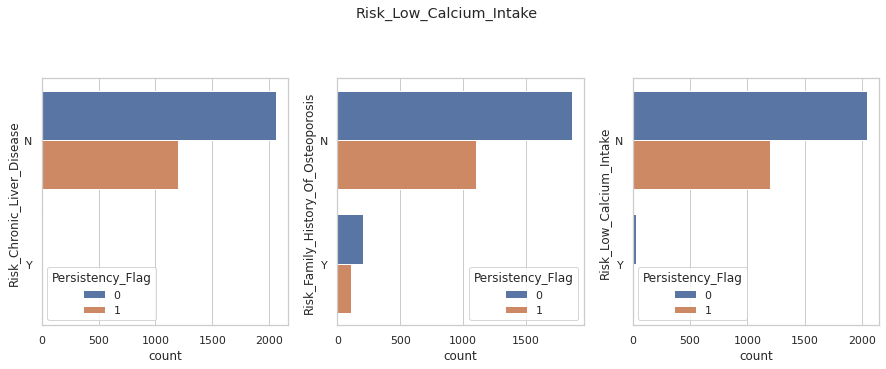

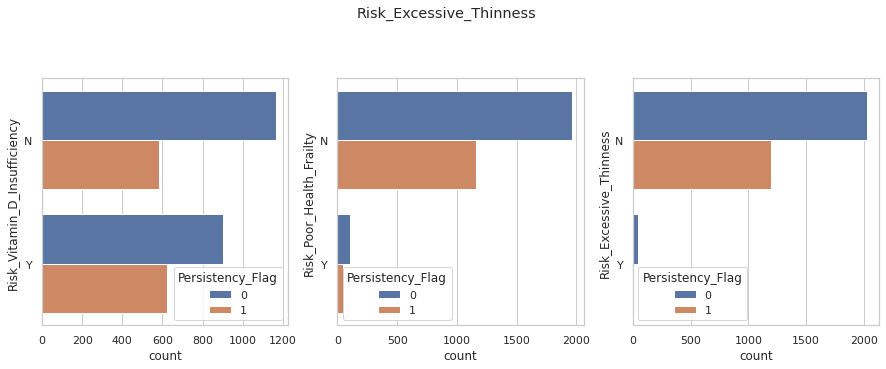

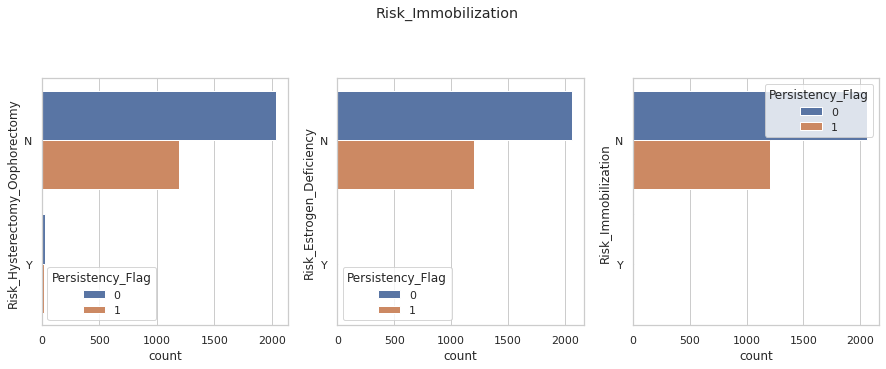

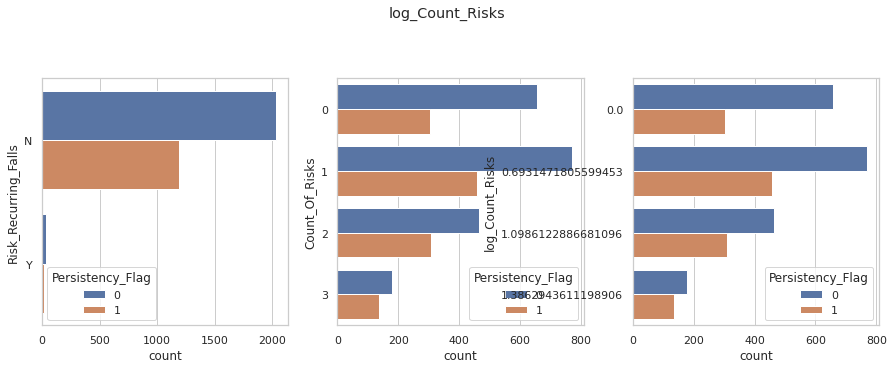

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
risk_cols = [col for col in data.columns if 'Risk' in col]
for x in risk_cols:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=data[x],hue=data['Persistency_Flag'],data=data,ax=ax1)
    fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

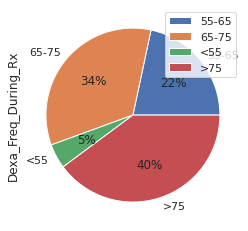

In [ ]:
data.groupby(['Age_Bucket']).sum().plot(kind='pie', y='Dexa_Freq_During_Rx',autopct='%1.0f%%')

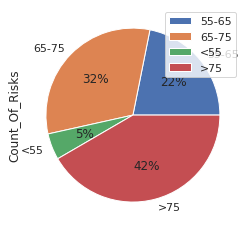

In [ ]:
data.groupby(['Age_Bucket']).sum().plot(kind='pie', y='Count_Of_Risks',autopct='%1.0f%%')

**Gender/ Count_Of_Risks**

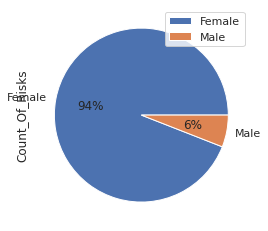

In [ ]:
data.groupby(['Gender']).sum().plot(kind='pie', y='Count_Of_Risks',autopct='%1.0f%%')

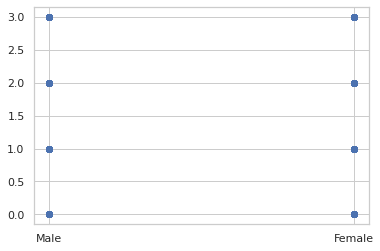

In [ ]:
plt.scatter(data['Gender'], data['Count_Of_Risks'])
plt.show()

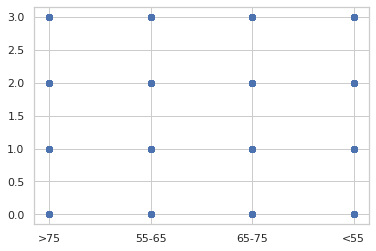

In [ ]:
plt.scatter(data['Age_Bucket'], data['Count_Of_Risks'])
plt.show()

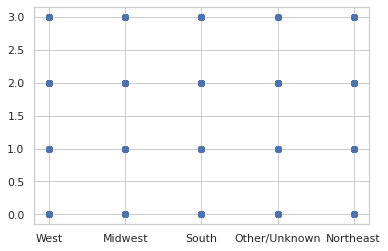

In [ ]:
plt.scatter(data['Region'], data['Count_Of_Risks'])
plt.show()

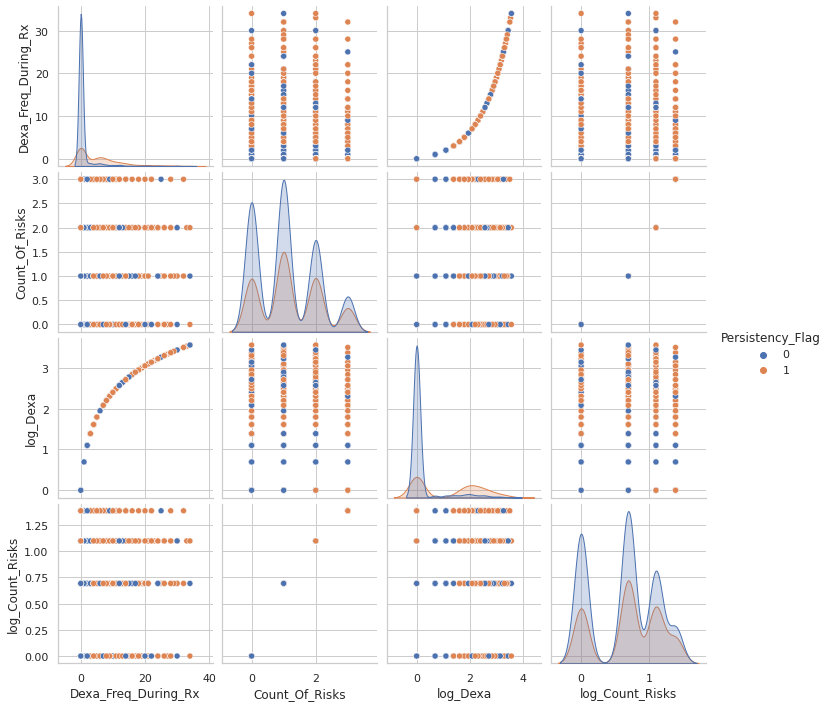

In [ ]:
sns.pairplot(data, hue ='Persistency_Flag')
plt.show()

## **What is the proportion of patients who were affected by the treatment and had a fracture?**

In [ ]:
pd.set_option('mode.chained_assignment', None) # Turning off pandas CopyWarning

df_g = data[['Frag_Frac_Prior_Ntm','Frag_Frac_During_Rx','Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx','Persistency_Flag']]
df_g.loc[df_g['Frag_Frac_During_Rx'] > df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'Yes'
df_g.loc[df_g['Frag_Frac_During_Rx'] <= df_g['Frag_Frac_Prior_Ntm'], 'Frag_consecu'] = 'No'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] > df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'Yes'
df_g.loc[df_g['Tscore_Bucket_Prior_Ntm'] <= df_g['Tscore_Bucket_During_Rx'], 'tscore_dis'] = 'No'

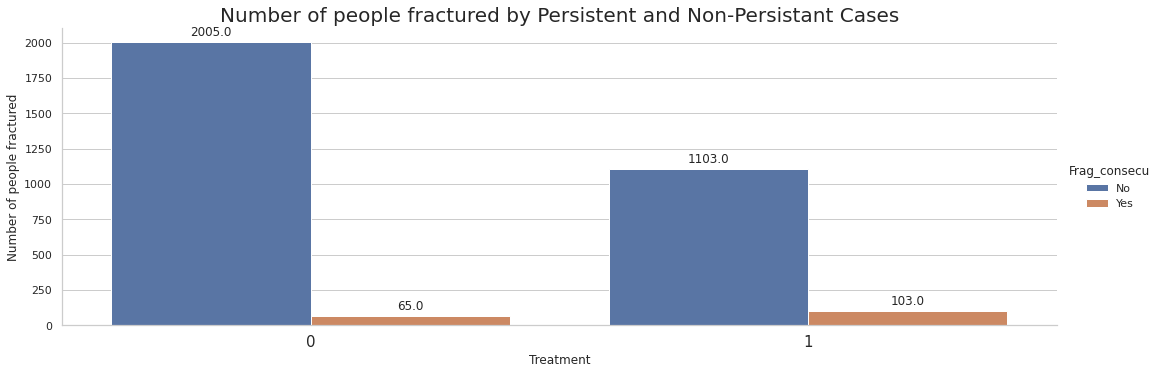

In [ ]:
df_ge = df_g.groupby(['Frag_consecu','Persistency_Flag'],as_index=False).count()
fg = sns.catplot(x='Persistency_Flag', y='tscore_dis', hue='Frag_consecu', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('Number of people fractured')
#fg.set_xticklabels(rotation=90)
fg.set_xticklabels(fontsize=15)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
ax.set_title("Number of people fractured by Persistent and Non-Persistant Cases", fontsize=20)
plt.show()

Of the total number of patients, 8% of people were affected by the treatment, weakening their bones

## **What is the proportion of patients who were affected by the treatment, decreasing their t-score?**

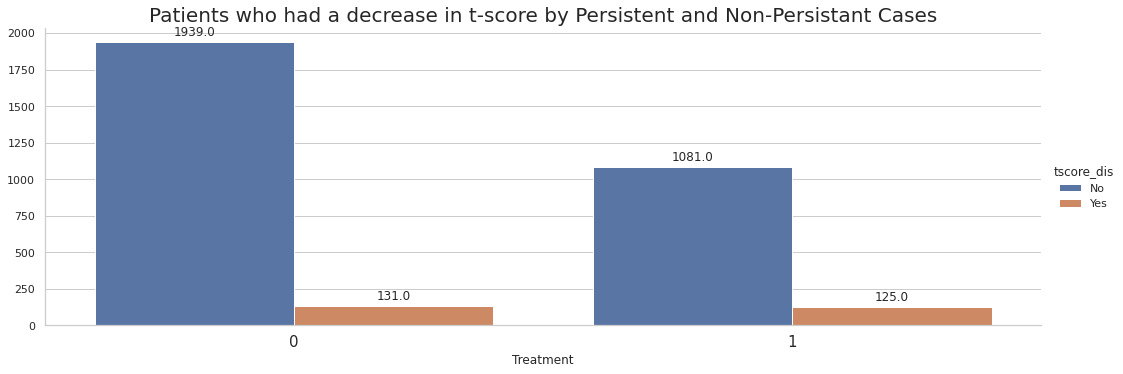

In [ ]:
df_ge = df_g.groupby(['tscore_dis','Persistency_Flag'],as_index=False).count()
fg = sns.catplot(x='Persistency_Flag', y='Frag_consecu', hue='tscore_dis', data=df_ge, kind='bar',aspect=3)
fg.set_xlabels('Treatment')
fg.set_ylabels('')
#fg.set_xticklabels(rotation=90)
fg.set_xticklabels(fontsize=15)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
ax.set_title("Patients who had a decrease in t-score by Persistent and Non-Persistant Cases", fontsize=20)
plt.show()

There is 10% of people with treatment who had a decrease in the t-score

# **Does the speciality of the person who prescribed the drug have any effect on the persistent rate?**

## Going to graph two graphs. First graph will show the distribution of specialities for presistent cases. The second with show the distribution of specialities for non presistent cases. 


In [ ]:
# function displays the % and # labeling for each piece of the pie

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

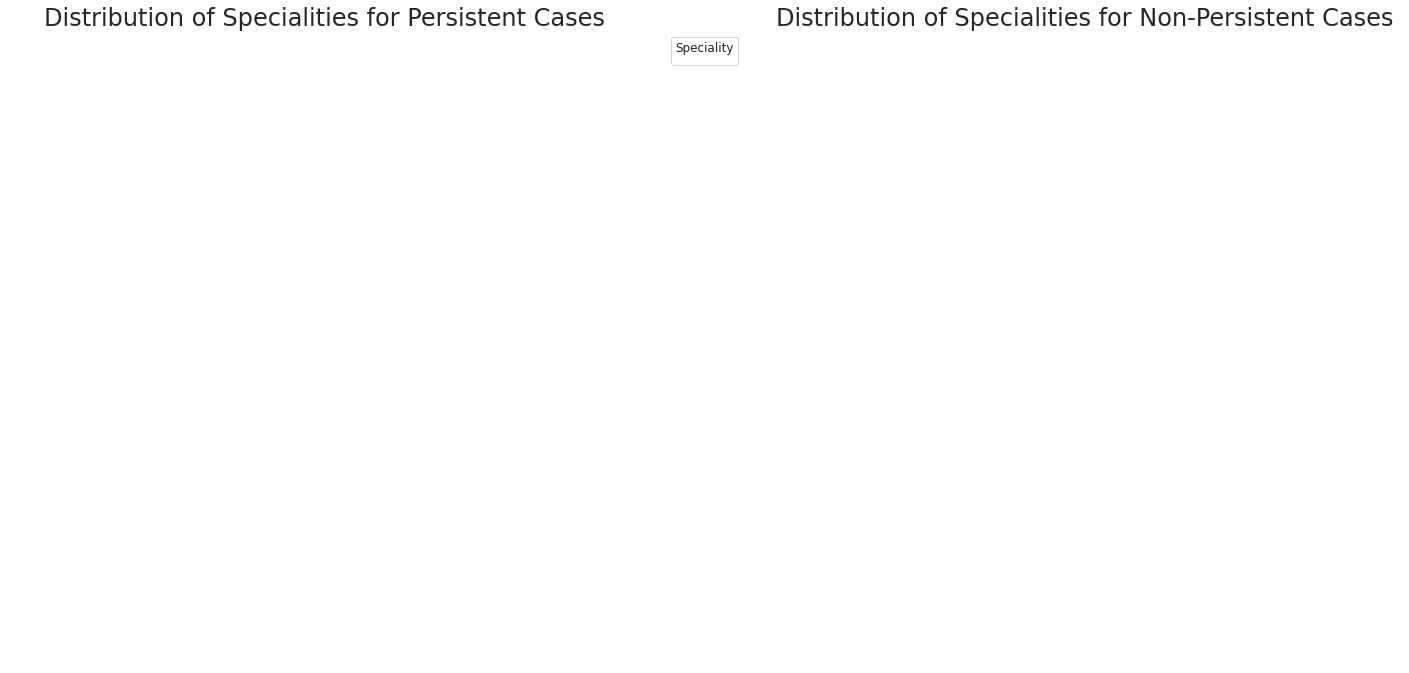

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (25,25), subplot_kw= dict(aspect= "equal"))
persistent_data = data[data.Persistency_Flag == "Persistent"]["Ntm_Speciality"]
non_persistent_data = data[data.Persistency_Flag == "Non-Persistent"]["Ntm_Speciality"]

per_spec = persistent_data.value_counts().values.tolist()
per_spec_label = persistent_data.value_counts().index.tolist()
non_per_spec = non_persistent_data.value_counts().values.tolist()
non_per_spec_label = non_persistent_data.value_counts().index.tolist()

wedges, texts, autotexts1 = ax1.pie(
    per_spec,
    autopct= lambda pct: func(pct, per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85
)

wedges, texts, autotexts2 = ax2.pie(
    non_per_spec,
    autopct= lambda pct: func(pct, non_per_spec),
    textprops= dict(color= "w"),
    pctdistance=0.85
)

ax1.legend(
    wedges,
    per_spec_label,
    title= "Speciality",
    loc= "upper center",
    bbox_to_anchor= (0.85, 0, 0.5, 1)
)
plt.setp(autotexts1, size= 17.5, weight= "bold")
plt.setp(autotexts2, size= 17.5, weight= "bold")
ax1.set_title("Distribution of Specialities for Persistent Cases", fontsize=24)
ax2.set_title("Distribution of Specialities for Non-Persistent Cases", fontsize=24)
plt.show()

We see that both pie charts are pretty similar in distribution of frequency for each speciality. Thus, we can rule out the possibly that one of the factors that the drug is persistent or not is the speciality that perscribed the drug in the first place. 

# **Does 'Ntm_Specialist_Flag'  and 'Ntm_Speciality_Bucket' variables have useful information for the classificacion task?**

In [ ]:
# Distribution of the target variable by each variable analized will be shown

pd.crosstab(data.Ntm_Specialist_Flag, data.Persistency_Flag, normalize='index')

Persistency_Flag            0         1
Ntm_Specialist_Flag                    
Others               0.686214  0.313786
Specialist           0.552553  0.447447

In [ ]:
pd.crosstab(data.Ntm_Speciality_Bucket, data.Persistency_Flag, normalize='index')

Persistency_Flag                  0         1
Ntm_Speciality_Bucket                        
Endo/Onc/Uro               0.473134  0.526866
OB/GYN/Others/PCP/Unknown  0.684884  0.315116
Rheum                      0.629565  0.370435

It seems Rheum flag in Ntm_Speciality_Bucket have some useful information

#  What about 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx'?

In [ ]:
pd.crosstab(data.Gluco_Record_Prior_Ntm, data.Persistency_Flag, normalize='index')

Persistency_Flag               0         1
Gluco_Record_Prior_Ntm                    
N                       0.627879  0.372121
Y                       0.645119  0.354881

In [ ]:
pd.crosstab(data.Gluco_Record_During_Rx, data.Persistency_Flag, normalize='index')

Persistency_Flag               0         1
Gluco_Record_During_Rx                    
N                       0.691044  0.308956
Y                       0.460808  0.539192

Gluco_Record_During_Rx seems to be more useful than Gluco_Record_Prior_Ntm to predict the target.

## **and about  'Dexa_Freq_During_Rx',  'Dexa_During_Rx'  and 'Frag_Frac_Prior_Ntm' variables ?**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


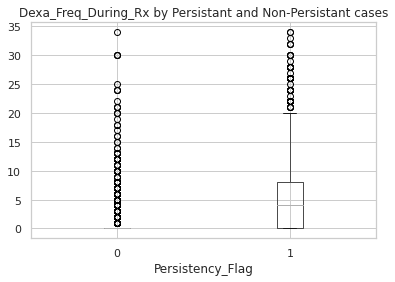

In [ ]:
data.boxplot(column='Dexa_Freq_During_Rx', by = 'Persistency_Flag')
title_boxplot = 'Dexa_Freq_During_Rx by Persistant and Non-Persistant cases'
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

The distribution of Dexa_Freq_During_Rx numbers seems to be higher in the Persistent patients

In [ ]:
pd.crosstab(data.Dexa_During_Rx, data.Persistency_Flag, normalize='index')

Persistency_Flag         0         1
Dexa_During_Rx                      
N                 0.770695  0.229305
Y                 0.241860  0.758140

In [ ]:
pd.crosstab(data.Frag_Frac_Prior_Ntm, data.Persistency_Flag, normalize='index')

Persistency_Flag            0         1
Frag_Frac_Prior_Ntm                    
N                    0.631064  0.368936
Y                    0.636187  0.363813

Varibles that are recorded during the treatment have more useful information for the classfication than others. It can be checked
with the percentajes shown by Dexa_During_Rx variable.

## **Does the gender play a role in the chances of a drug being persistent or not?**

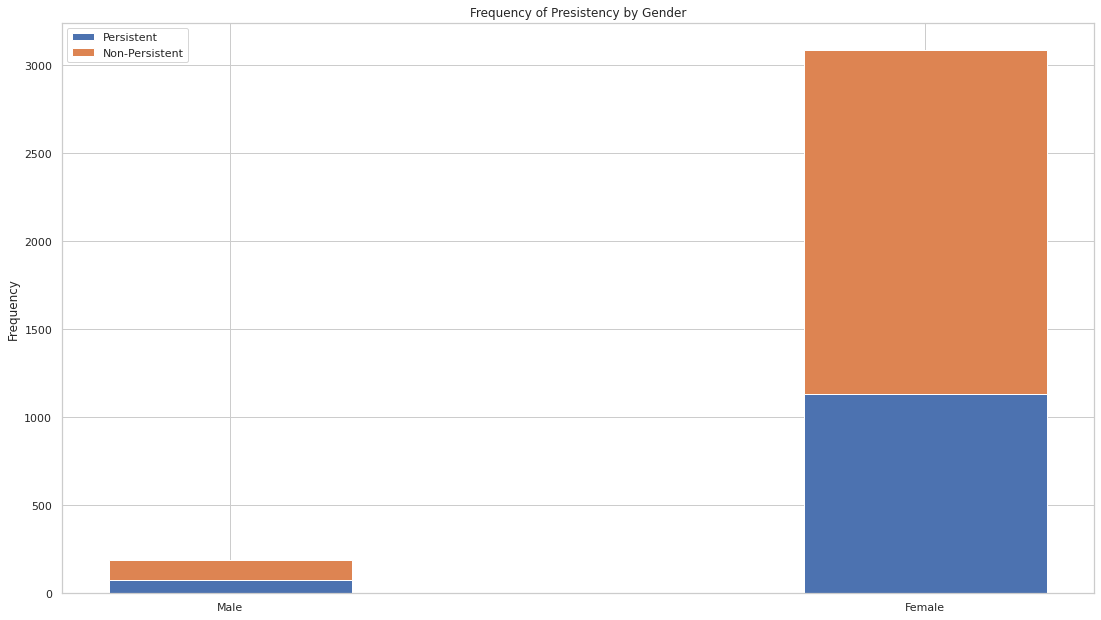

In [ ]:
male_data = data[data.Gender == "Male"]
female_data = data[data.Gender == "Female"]

labels = ["Male", "Female"]
per_counts = [
    male_data["Persistency_Flag"].value_counts().values.tolist()[1],
    female_data["Persistency_Flag"].value_counts().values.tolist()[1]
]
non_per_counts = [
    male_data["Persistency_Flag"].value_counts().values.tolist()[0],
    female_data["Persistency_Flag"].value_counts().values.tolist()[0]
]

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)

ax.bar(labels, per_counts, width= 0.35, label= "Persistent")
ax.bar(labels, non_per_counts, width= 0.35, bottom= per_counts, label= "Non-Persistent")

ax.set_ylabel("Frequency")
ax.set_title("Frequency of Presistency by Gender")
ax.legend()

plt.show()

60% of males are flagged as non-persistent. <br />
62% of females are flagged as non-persistent. <br />

Seems about the same, which tells us both genders are experiencing the results from the drug when it comes to the persistency. 

### Balance Dataset

In [ ]:
data["Persistency_Flag"].value_counts()

0    2070
1    1206
Name: Persistency_Flag, dtype: int64

Note: The Non-Persistent observations are almost double the Persistent observations.

Next step is to balance the data using either the Random-Undersampling or Random_Oversampling method.

In [ ]:
# Undersampling 

# # import library
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# x_temp, y_temp = rus.fit_resample(data.drop(["Persistency_Flag"], axis=1), data["Persistency_Flag"])


# Oversampling

# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_temp, y_temp = ros.fit_resample(data.drop(["Persistency_Flag"], axis=1), data["Persistency_Flag"])

In [ ]:
data = pd.concat([x_temp, y_temp], axis=1)

In [ ]:
data["Persistency_Flag"].value_counts()

1    2070
0    2070
Name: Persistency_Flag, dtype: int64

In [ ]:
cleaned_data = data

# Select the Features
features = cleaned_data.drop(["Persistency_Flag"], axis=1)

In [ ]:
# Convert categorical feature variables
data_with_dummies = pd.get_dummies(features, prefix=None, drop_first = True, prefix_sep='_')

In [ ]:
# Remove special characters from the feature names
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.reset_option('all')

data_with_dummies.columns = data_with_dummies.columns.str.replace('[">"]', 'greater_than')
data_with_dummies.columns = data_with_dummies.columns.str.replace('[" "]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["&"]', 'and')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["/"]', '_or_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('[","]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["<"]', 'less_than')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["\-"]', '_')
data_with_dummies.columns = data_with_dummies.columns.str.replace('["\."]', '_point_')
# data_with_dummies.columns = data_with_dummies.columns.str.replace('["_"]', '')

### Create Dummy Variables

In [ ]:
# For loop to find dummy features that are not well formatted

columns = list(data_with_dummies.columns)
            
for item in columns:
    special_characters = "!@#$%^&*()-+?=,<>/"
    
    for character in special_characters:
        if character in item:
            print(f"Feature: {item}, is not well formatted")

In [ ]:
data_with_dummies.head()

Dexa_Freq_During_Rx  Count_Of_Risks  log_Dexa  log_Count_Risks  \
0                    0               0       0.0         0.000000   
1                    0               0       0.0         0.000000   
2                    0               2       0.0         1.098612   
3                    0               1       0.0         0.693147   
4                    0               1       0.0         0.693147   

   Gender_Male  Race_Asian  Race_Caucasian  Race_Other_or_Unknown  \
0            1           0               1                      0   
1            1           1               0                      0   
2            0           0               0                      1   
3            0           0               1                      0   
4            0           0               1                      0   

   Ethnicity_Not_Hispanic  Ethnicity_Unknown  ...  \
0                       1                  0  ...   
1                       1                  0  ...   
2                       0                  0  ...   
3                       1                  0  ...   
4                       1                  0  ...   

   Risk_Family_History_Of_Osteoporosis_Y  Risk_Low_Calcium_Intake_Y  \
0                                      0                          0   
1                                      0                          0   
2                                      0                          1   
3                                      0                          0   
4                                      0                          0   

   Risk_Vitamin_D_Insufficiency_Y  Risk_Poor_Health_Frailty_Y  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   Risk_Excessive_Thinness_Y  Risk_Hysterectomy_Oophorectomy_Y  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   Risk_Estrogen_Deficiency_Y  Risk_Immobilization_Y  Risk_Recurring_Falls_Y  \
0                           0                      0                       0   
1                           0                      0                       0   
2                           0                      0                       0   
3                           0                      0                       0   
4                           0                      0                       0   

   Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_Y  
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

[5 rows x 118 columns]

In [ ]:
data_with_dummies.columns

Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'log_Dexa', 'log_Count_Risks',
       'Gender_Male', 'Race_Asian', 'Race_Caucasian', 'Race_Other_or_Unknown',
       'Ethnicity_Not_Hispanic', 'Ethnicity_Unknown',
       ...
       'Risk_Family_History_Of_Osteoporosis_Y', 'Risk_Low_Calcium_Intake_Y',
       'Risk_Vitamin_D_Insufficiency_Y', 'Risk_Poor_Health_Frailty_Y',
       'Risk_Excessive_Thinness_Y', 'Risk_Hysterectomy_Oophorectomy_Y',
       'Risk_Estrogen_Deficiency_Y', 'Risk_Immobilization_Y',
       'Risk_Recurring_Falls_Y',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx_Y'],
      dtype='object', length=118)

### Selecting the final Dependent and Independent variables

In [ ]:
cleaned_data["Persistency_Flag"].value_counts()

1    2070
0    2070
Name: Persistency_Flag, dtype: int64

In [ ]:
y = cleaned_data["Persistency_Flag"]
X = data_with_dummies

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 44)

# Model Selection and Optimization

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# To ignore convergence warning
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def cal_accuracy(y_test, y_hat):

    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_hat))

    print ("F1 Score: ",
           f1_score(y_test,y_hat)*100)

    print("Report : \n",
    classification_report(y_test, y_hat))
    

def Model(xtrain, ytrain, xval, yval, name, model):
    model_name = name + "Model"
    
    print("\033[1m" + name + "\033[0m")
    print(f"")
    
    # Train Model
    model.fit(xtrain, ytrain)
    
#     Cross Validation with the training data set
#     print(cross_val_score(model, xval, yval, scoring="f1", cv = 5)*100)
#     mean_score = cross_val_score(model, xval, yval, scoring="f1", cv = 5).mean()
#     print(f"Mean CV F1: {mean_score*100}")
    
    
    y_hat_val = model.predict(xval)
#     y_hat_train = model.predict(xtrain)
#     print(f"Train Accuracy Score: {round(accuracy_score(y_hat_train, ytrain), 2)}")
#     print(f"Test Accuracy Score: {round(accuracy_score(y_hat_test, ytest), 2)}")
    print(f"")
        
    cal_accuracy(yval, y_hat_val)
    
    
Classification_models = {"LogisticRegression":LogisticRegression(solver='lbfgs', verbose=0),
                         "DecisionTreeClassifier":DecisionTreeClassifier(),
                         "XGBClassifier":XGBClassifier(),
                         "BaggingClassifier":BaggingClassifier(),
                         "BernoulliNB":BernoulliNB(),
                         "SGDClassifier":SGDClassifier(),
                         "KNeighborsClassifier":KNeighborsClassifier(),
                         "RandomForestClassifier":RandomForestClassifier(),
                         "AdaBoostClassifier":AdaBoostClassifier(),
                         "Gradient Boosting Classifier":GradientBoostingClassifier(),
                         "LGBM Classifier":LGBMClassifier(),
                        }

for name, model in Classification_models.items():
    Model(X_train, y_train, X_test, y_test, name, model)

LogisticRegression


Confusion Matrix: 
 [[330  80]
 [ 82 336]]
F1 Score:  80.57553956834532
Report : 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       410
           1       0.81      0.80      0.81       418

    accuracy                           0.80       828
   macro avg       0.80      0.80      0.80       828
weighted avg       0.80      0.80      0.80       828

DecisionTreeClassifier


Confusion Matrix: 
 [[303 107]
 [ 45 373]]
F1 Score:  83.07349665924276
Report : 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       410
           1       0.78      0.89      0.83       418

    accuracy                           0.82       828
   macro avg       0.82      0.82      0.82       828
weighted avg       0.82      0.82      0.82       828

XGBClassifier


Confusion Matrix: 
 [[334  76]
 [ 83 335]]
F1 Score:  80.8202653799759
Report : 
               precision    recall  f

Note: The RandomForest Classifier Model performed well on the dataset.

## Hyperparameter Tuning

## Grid Search - RandomForest

In [ ]:
# sklearn.metrics.get_scorer_names()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [90,100,115,130], # learning rate
    'criterion': ["gini", "entropy"], # number of epochs
    'max_depth': range(2, 20, 1), # loss function
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['sqrt', 'log2']
}

# Create a based model
clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = clf, scoring="f1", param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

bestModel = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
y_hat_test = bestModel.predict(X_test)
cal_accuracy(y_test, y_hat_test)

Confusion Matrix: 
 [[342  68]
 [ 72 346]]
F1 Score:  83.17307692307692
Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       410
           1       0.84      0.83      0.83       418

    accuracy                           0.83       828
   macro avg       0.83      0.83      0.83       828
weighted avg       0.83      0.83      0.83       828

